# Data Visualization Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import io
%matplotlib inline

Lots of visualization codings were provided by the Data Analyst Udacity Nanodegree course.

## Data Wrangling

First, I downloaded the columns I needed to make my observations.

In [2]:
data=pd.read_csv('pisa2012.csv',
                   usecols=["PV1MATH","PV2MATH","PV3MATH","PV4MATH","PV1READ","PV2READ","PV3READ","PV4READ","PV5READ","PV1SCIE","PV2SCIE","PV3SCIE","PV4SCIE","PV5SCIE","PV5SCIE","ST04Q01","NC","ST43Q01","ST43Q02","ST43Q03","ST43Q04","ST43Q05","ST43Q05","ST43Q06"])

Second, I checked the number of rows in every variable.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 22 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   NC       485490 non-null  object 
 1   ST04Q01  485490 non-null  object 
 2   ST43Q01  314971 non-null  object 
 3   ST43Q02  314182 non-null  object 
 4   ST43Q03  313494 non-null  object 
 5   ST43Q04  313420 non-null  object 
 6   ST43Q05  313228 non-null  object 
 7   ST43Q06  313470 non-null  object 
 8   PV1MATH  485490 non-null  float64
 9   PV2MATH  485490 non-null  float64
 10  PV3MATH  485490 non-null  float64
 11  PV4MATH  485490 non-null  float64
 12  PV1READ  485490 non-null  float64
 13  PV2READ  485490 non-null  float64
 14  PV3READ  485490 non-null  float64
 15  PV4READ  485490 non-null  float64
 16  PV5READ  485490 non-null  float64
 17  PV1SCIE  485490 non-null  float64
 18  PV2SCIE  485490 non-null  float64
 19  PV3SCIE  485490 non-null  float64
 20  PV4SCIE  485490 non-null  

In [5]:
data.describe()

,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
count,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.00000,485490.000000
mean,469.621653,469.648358,469.648930,469.641832,472.004640,472.068052,472.022059,471.926562,472.013506,475.769824,475.813674,475.851549,475.78524,475.820184
std,103.265391,103.382077,103.407631,103.392286,102.505523,102.626198,102.640489,102.576066,102.659989,101.464426,101.514649,101.495072,101.51220,101.566347
min,19.792800,6.473000,42.226200,24.622200,0.083400,0.703500,0.703500,4.134400,2.307400,2.648300,2.834800,11.879900,8.42970,17.754600
25%,395.318600,395.318600,395.240700,395.396500,403.600700,403.360100,403.360100,403.354600,403.360100,404.457300,404.457300,404.550500,404.45730,404.457300
50%,466.201900,466.124000,466.201900,466.279800,475.455000,475.535200,475.455000,475.535200,475.535200,475.699400,475.606100,475.699400,475.97910,475.885900
75%,541.057800,541.447300,541.291500,541.447300,544.502500,544.503500,544.503500,544.502500,544.503500,547.780700,547.873900,547.967200,547.78070,547.780700
max,962.229300,957.010400,935.745400,943.456900,904.802600,881.239200,884.447000,881.159000,901.608600,903.338300,900.540800,867.624000,926.55730,880.958600


In [6]:
data[data['PV1MATH']==395.318600]['PV3MATH'].value_counts()

417.9078    4
408.5605    4
389.8660    4
389.0871    3
385.9713    3
           ..
331.4457    1
370.3926    1
399.9922    1
283.9305    1
377.4030    1
Name: PV3MATH, Length: 75, dtype: int64

### Getting only one value for each subject field
As I don't know how to interpret different values of PV1-PV5 (for example: PV1MATH, PV2MATH,PV3MATH,PV4MATH), I decided to get one big variable with the mean of each these PV1-PV5.

For each subject field, I took the mean between every variable and I checked if the mean was rightly calculated.

In [7]:
data['Math_score']=(data['PV1MATH']+data['PV2MATH']+data['PV3MATH']+data['PV4MATH'])/4

In [8]:
data[['Math_score','PV1MATH','PV2MATH','PV3MATH','PV4MATH']].head()

,Math_score,PV1MATH,PV2MATH,PV3MATH,PV4MATH
0,362.252700,406.8469,376.4683,344.5319,321.1637
1,469.200825,486.1427,464.3325,453.4273,472.9008
2,498.605700,533.2684,481.0796,489.6479,490.4269
3,448.247400,412.2215,498.6836,415.3373,466.7472
4,383.089275,381.9209,328.1742,403.7311,418.5309


In [9]:
data['Reading_score']=(data['PV1READ']+data['PV2READ']+data['PV3READ']+data['PV4READ']+data['PV5READ'])/5

In [10]:
data[['Reading_score','PV1READ','PV2READ','PV3READ','PV4READ']].head()

,Reading_score,PV1READ,PV2READ,PV3READ,PV4READ
0,261.01424,249.5762,254.3420,406.8496,175.7053
1,384.68832,406.2936,349.8975,400.7334,369.7553
2,405.18154,401.2100,404.3872,387.7067,431.3938
3,477.46376,547.3630,481.4353,461.5776,425.0393
4,256.01010,311.7707,141.7883,293.5015,272.8495


In [11]:
data['Science_score']=(data['PV1SCIE']+data['PV2SCIE']+data['PV3SCIE']+data['PV4SCIE']+data['PV5SCIE'])/5

In [12]:
data[['Science_score','PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].head()

,Science_score,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,371.91348,341.7009,408.8400,348.2283,367.8105,392.9877
1,478.12382,548.9929,471.5964,471.5964,443.6218,454.8116
2,486.60946,499.6643,428.7952,492.2044,512.7191,499.6643
3,453.97240,438.6796,481.5740,448.9370,474.1141,426.5573
4,367.15778,361.5628,275.7740,372.7527,403.5248,422.1746


The means are been well-made, so I could drop the columns that served to calculate them.

In [14]:
data_clean=data.drop(['PV1MATH','PV2MATH','PV2MATH','PV3MATH','PV4MATH','PV1READ','PV2READ','PV3READ','PV4READ','PV5READ','PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE'],axis=1).copy()

### Renaming the columns

Right now, I've got to change the column names in order to get something more explicit. 

For the country, I took National Centre for "Country" and the "Gender" was a question in the survey. I copy the dictionnary for the other variables:

ST43Q01,"Perceived Control - Can Succeed with Enough Effort"

ST43Q02,"Perceived Control - Doing Well is Completely Up to Me"

ST43Q03,"Perceived Control - Family Demands and Problems"

ST43Q04,"Perceived Control - Different Teachers"

ST43Q05,"Perceived Control - If I Wanted I Could Perform Well"

ST43Q06,"Perceived Control - Perform Poorly Regardless"

In [15]:
data_clean=data_clean.rename(columns={"ST04Q01":"Gender","NC": "country", "ST43Q01": "can_succeed_if_effort","ST43Q02":"up_to_me","ST43Q03":"Family_Demands","ST43Q04":"Different_Teachers","ST43Q05":"Can_perform_if_wanted","ST43Q06":"Perform_Poorly_Regardless"})

Right now, I've got the right column names

In [16]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   country                    485490 non-null  object 
 1   Gender                     485490 non-null  object 
 2   can_succeed_if_effort      314971 non-null  object 
 3   up_to_me                   314182 non-null  object 
 4   Family_Demands             313494 non-null  object 
 5   Different_Teachers         313420 non-null  object 
 6   Can_perform_if_wanted      313228 non-null  object 
 7   Perform_Poorly_Regardless  313470 non-null  object 
 8   Math_score                 485490 non-null  float64
 9   Reading_score              485490 non-null  float64
 10  Science_score              485490 non-null  float64
dtypes: float64(3), object(8)
memory usage: 40.7+ MB


I like the variables I've created, because it's pretty well distributed as the describe function shows it.

In [17]:
data_clean.describe()

,Math_score,Reading_score,Science_score
count,485490.000000,485490.000000,485490.000000
mean,469.640193,472.006964,475.808094
std,100.942006,98.863310,97.998470
min,54.767075,6.445400,25.158540
25%,396.058575,405.044200,405.762800
50%,465.812450,475.477980,475.512860
75%,540.162025,542.831195,546.381920
max,921.179300,849.359740,857.832900


## Univariate Analysis

### Country and Gender variables

Text(0.5, 1.0, 'Country distribution')

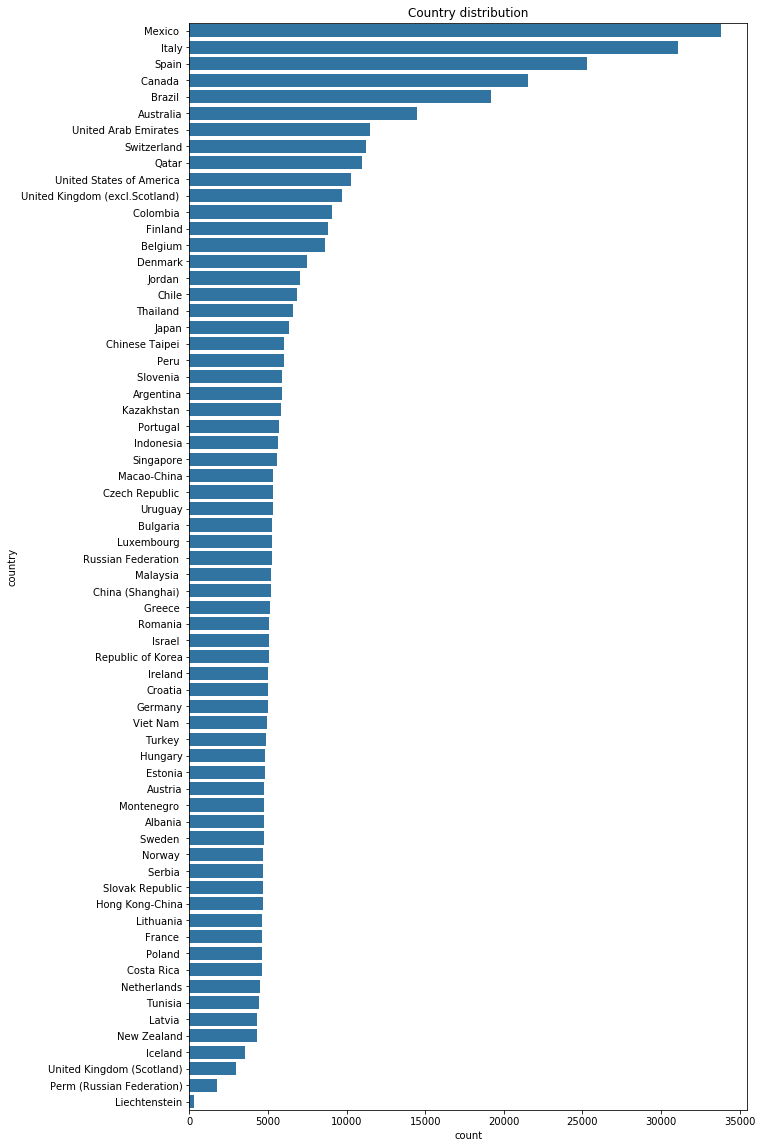

In [18]:
plt.figure(figsize=(10,20))
base_color=sb.color_palette()[0]
data_clean_count=data_clean['country'].value_counts()
country_counts_order=data_clean.groupby('country')['Math_score'].count()
country_counts_order=country_counts_order.sort_values(ascending=False).index
sb.countplot(data=data_clean,y='country',order=country_counts_order,color=base_color)
plt.title ('Country distribution')

As the graphic is difficult to read, I prefered to get also the value_counts function

In [19]:
data_clean['country'].value_counts()

Mexico                       33806
Italy                        31073
Spain                        25313
Canada                       21544
Brazil                       19204
                             ...  
New Zealand                   4291
Iceland                       3508
United Kingdom (Scotland)     2945
Perm (Russian Federation)     1761
Liechtenstein                  293
Name: country, Length: 66, dtype: int64

There isn't any gender bias in this dataset as Male and Female have got nearly the same number of observations.

Text(0.5, 1.0, 'Gender Distribution')

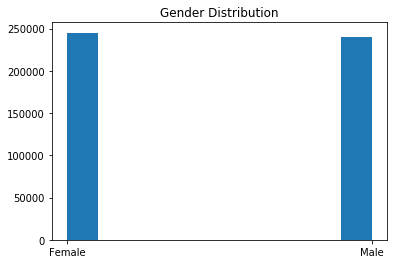

In [20]:
plt.hist(data_clean['Gender'])
plt.title('Gender Distribution')

I've checked the distribution of mindset variables, but as I had to get another dataset in order to get the right visulization possibilities. So I sliced the data_clean into data_clean_perf in order to make visulizations in this variable.

### Mindset visualizations

In [21]:
data_clean['can_succeed_if_effort'].value_counts()

Strongly agree       155325
Agree                137816
Disagree              18002
Strongly disagree      3828
Name: can_succeed_if_effort, dtype: int64

In [22]:
data_clean_perf=data_clean[data_clean['can_succeed_if_effort'].notnull()]
data_clean_perf=data_clean_perf[data_clean_perf['Can_perform_if_wanted'].notnull()]
data_clean_perf=data_clean_perf[data_clean_perf['Perform_Poorly_Regardless'].notnull()]
data_clean_perf=data_clean_perf[data_clean_perf['Family_Demands'].notnull()]
data_clean_perf=data_clean_perf[data_clean_perf['Different_Teachers'].notnull()]
data_clean_perf=data_clean_perf[data_clean_perf['up_to_me'].notnull()]

As we can see, there is much less observations in the sliced dataframe than in the cleaned dataframe, but selecting one variable rather than another wouldn't have been useful either.

In [23]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   country                    485490 non-null  object 
 1   Gender                     485490 non-null  object 
 2   can_succeed_if_effort      314971 non-null  object 
 3   up_to_me                   314182 non-null  object 
 4   Family_Demands             313494 non-null  object 
 5   Different_Teachers         313420 non-null  object 
 6   Can_perform_if_wanted      313228 non-null  object 
 7   Perform_Poorly_Regardless  313470 non-null  object 
 8   Math_score                 485490 non-null  float64
 9   Reading_score              485490 non-null  float64
 10  Science_score              485490 non-null  float64
dtypes: float64(3), object(8)
memory usage: 40.7+ MB


In [24]:
data_clean_perf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309140 entries, 1 to 485489
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   country                    309140 non-null  object 
 1   Gender                     309140 non-null  object 
 2   can_succeed_if_effort      309140 non-null  object 
 3   up_to_me                   309140 non-null  object 
 4   Family_Demands             309140 non-null  object 
 5   Different_Teachers         309140 non-null  object 
 6   Can_perform_if_wanted      309140 non-null  object 
 7   Perform_Poorly_Regardless  309140 non-null  object 
 8   Math_score                 309140 non-null  float64
 9   Reading_score              309140 non-null  float64
 10  Science_score              309140 non-null  float64
dtypes: float64(3), object(8)
memory usage: 28.3+ MB


There isn't any Gender bias in this dataframe either, because the number of observations are nearly the same.

Text(0.5, 1.0, 'Gender distribution - Rows that contain Perceived Control values')

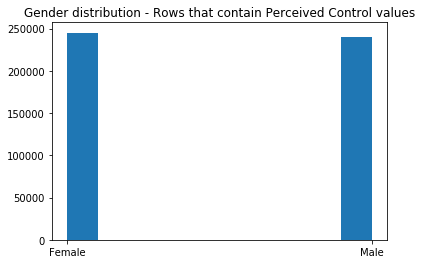

In [25]:
plt.hist(data_clean['Gender'])
plt.title('Gender distribution - Rows that contain Perceived Control values')

### Mindset Univariate distribution

Some of these mindset variables haven't a lot of different values: "can_succeed_if_effort","up_to_me","can_perform_if_wanted"
"Perform_poorly_Regardless" has a greater distribution. "Family Demands" and "Different Teachers" have got the greatest distribution.

It might be that students attitude are biasis because of the difficulty to see the problems, but I've got enough rows to make analysis.

Text(0.5, 1.0, 'Can Succeed if effort distribution')

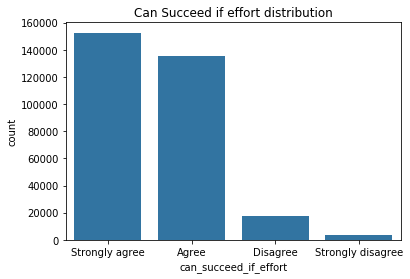

In [40]:
order_control_ascending=['Strongly disagree',"Disagree","Agree","Strongly agree"]
order_control_descending=["Strongly agree","Agree","Disagree","Strongly disagree"]
sb.countplot(data=data_clean_perf,x="can_succeed_if_effort",order=order_control_descending,color=base_color)
plt.title('Can Succeed if effort distribution')

Text(0.5, 1.0, 'up to me distribution')

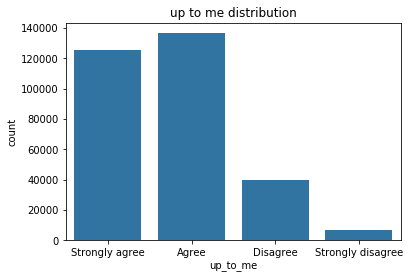

In [41]:
sb.countplot(data=data_clean_perf,x="up_to_me",order=order_control_descending,color=base_color)
plt.title('up to me distribution')


Text(0.5, 1.0, 'Family Demands distribution')

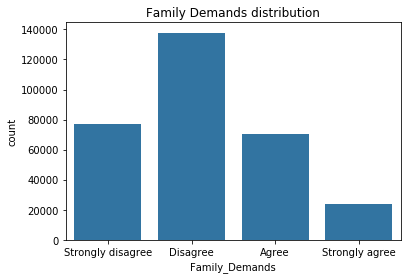

In [35]:
base_color=sb.color_palette()[0]
sb.countplot(data=data_clean_perf,x="Family_Demands",order=order_control_ascending,color=base_color)
plt.title('Family Demands distribution')

Text(0.5, 1.0, 'Different Teachers distribution')

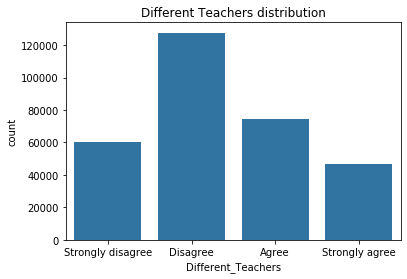

In [36]:
sb.countplot(data=data_clean_perf,x='Different_Teachers',order=order_control_ascending,color=base_color)
plt.title('Different Teachers distribution')

Text(0.5, 1.0, 'Can Perform if Wanted distribution')

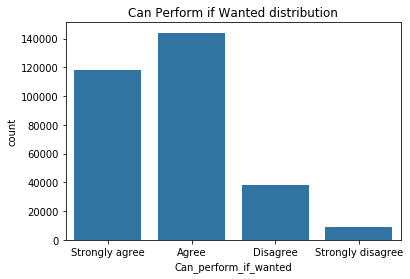

In [38]:
sb.countplot(data=data_clean_perf,x='Can_perform_if_wanted',order=order_control_descending,color=base_color)
plt.title('Can Perform if Wanted distribution')

Text(0.5, 1.0, 'Perform Poorly Regardless distribution')

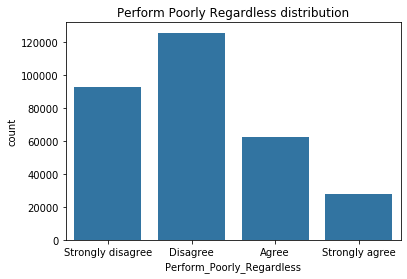

In [39]:
sb.countplot(data=data_clean_perf,x='Perform_Poorly_Regardless',order=order_control_ascending,color=base_color)
plt.title('Perform Poorly Regardless distribution')

### Scores distribution

It's great, because "Math_score","Reading_score" and "Science_score" have got a lot of distribution variety.

Text(0.5, 1.0, 'Math score distribution')

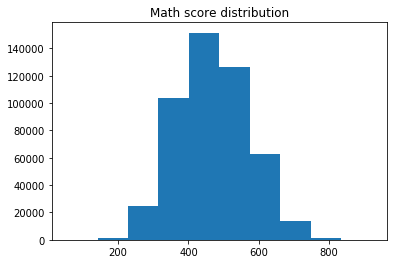

In [42]:
plt.hist(data_clean['Math_score'])
plt.title('Math score distribution')

Text(0.5, 1.0, 'Reading Score distribution')

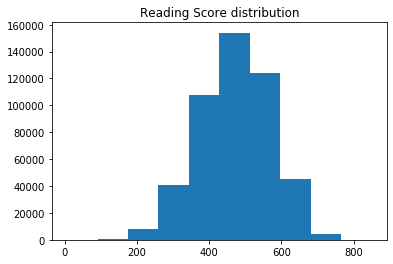

In [43]:
plt.hist(data_clean['Reading_score'])
plt.title('Reading Score distribution')

Text(0.5, 1.0, 'Science score distribution')

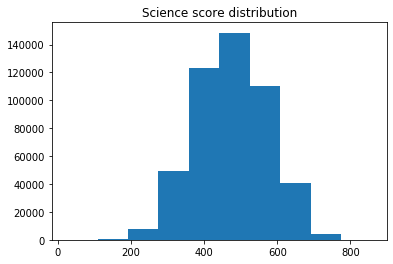

In [44]:
plt.hist(data_clean['Science_score'])
plt.title('Science score distribution')

### Scores

The distribution of Math, Reading and Science scores haven't got any biasis due to mindset missing values, so we could analyse the results.

Text(0.5, 1.0, 'Math Score distribution - only rows with Perceived Control')

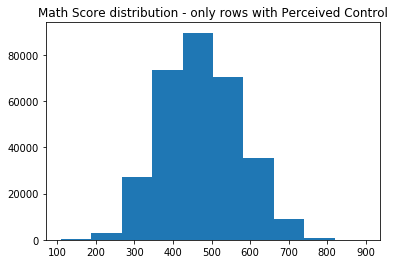

In [45]:
plt.hist(data_clean_perf['Math_score'])
plt.title('Math Score distribution - only rows with Perceived Control')

Text(0.5, 1.0, 'Reading Score distribution - only rows with Perceived Control')

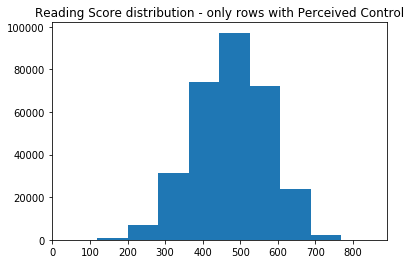

In [46]:
plt.hist(data_clean_perf['Reading_score'])
plt.title('Reading Score distribution - only rows with Perceived Control')

Text(0.5, 1.0, 'Science Score distribution - only rows with Perceived Control')

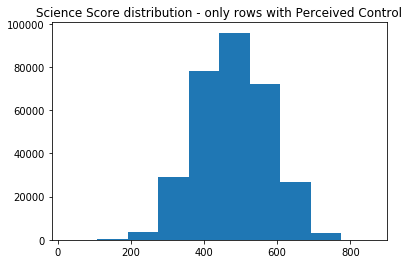

In [47]:
plt.hist(data_clean_perf['Science_score'])
plt.title('Science Score distribution - only rows with Perceived Control')

## Bivariate results

### Gender VS Scores

There isn't any statistical difference between Gender in "Math Score","Reading Score" and "Science Score", even if female would have slightly greater scores in Reading, and male would have slightly greater scores in Math and Science.

Text(0.5, 1.0, 'Science Score')

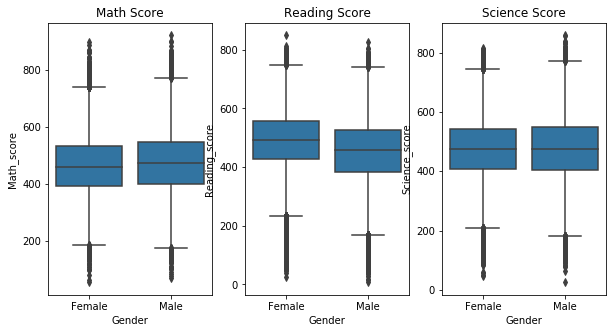

In [36]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean, x = 'Gender', y = 'Math_score', color = base_color)
plt.title('Math Score')
# right plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = data_clean, x = 'Gender', y = 'Reading_score', color = base_color)
plt.title('Reading Score')
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.subplot(1, 3, 3)
sb.boxplot(data = data_clean, x = 'Gender', y = 'Science_score', color = base_color)
plt.title('Science Score')


### Country VS Score

First, I've checked the countries which had the greatest scores in the free subject fields

In [37]:
data_clean.groupby('country')['Math_score'].mean().sort_values(ascending=False)

country
China (Shanghai)     611.418087
Singapore            568.639306
Hong Kong-China      560.905017
Chinese Taipei       558.247954
Republic of Korea    553.662501
                        ...    
Jordan               382.812189
Brazil               382.537571
Qatar                376.320202
Indonesia            375.545086
Peru                 367.757737
Name: Math_score, Length: 66, dtype: float64

In [38]:
data_clean.groupby('country')['Reading_score'].mean().sort_values(ascending=False)

country
China (Shanghai)     568.629233
Hong Kong-China      544.521735
Singapore            537.742138
Japan                537.722484
Republic of Korea    535.805221
                        ...    
Jordan               396.514701
Albania              396.250245
Kazakhstan           394.143966
Qatar                387.407142
Peru                 384.453116
Name: Reading_score, Length: 66, dtype: float64

In [39]:
data_clean.groupby('country')['Science_score'].mean().sort_values(ascending=False)

country
China (Shanghai)     579.556540
Hong Kong-China      554.986433
Singapore            546.822920
Japan                546.413455
Estonia              543.241849
                        ...    
Tunisia              397.831316
Brazil               395.513221
Qatar                383.531664
Indonesia            382.744804
Peru                 373.440303
Name: Science_score, Length: 66, dtype: float64

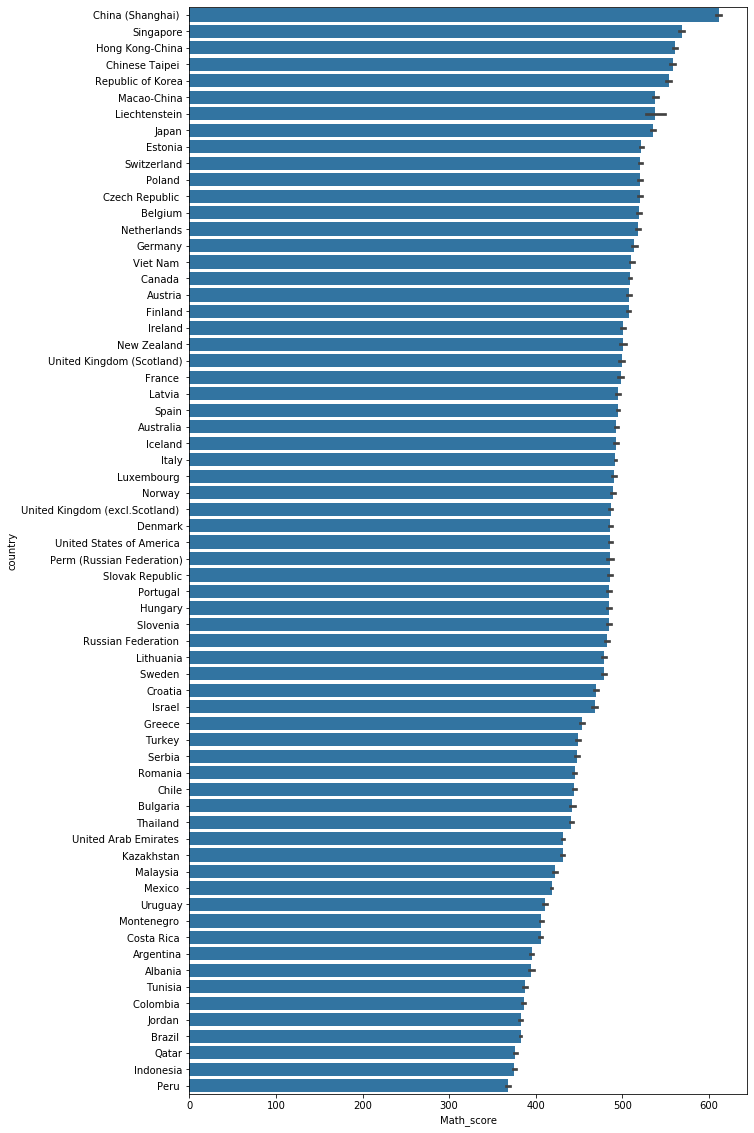

In [43]:
plt.figure(figsize=(10,20))
base_color=sb.color_palette()[0]
Science_score_means=data_clean.groupby('country')['Math_score'].mean()
math_order=Science_score_means.sort_values(ascending=False).index
data_clean_math=data_clean['country'].value_counts()
sb.barplot(x="Math_score", y="country", data=data_clean,order=math_order,color=base_color)

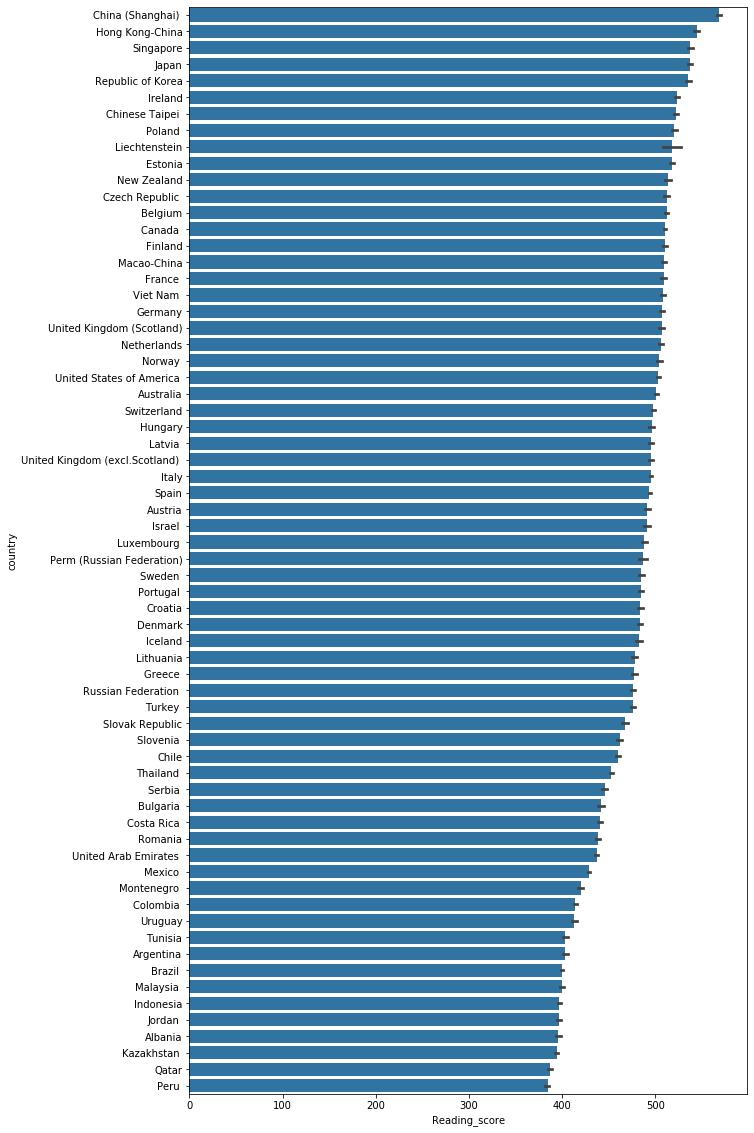

In [44]:
plt.figure(figsize=(10,20))
base_color=sb.color_palette()[0]
Science_score_means=data_clean.groupby('country')['Reading_score'].mean()
reading_order=Science_score_means.sort_values(ascending=False).index
data_clean_math=data_clean['country'].value_counts()
sb.barplot(x="Reading_score", y="country", data=data_clean, order=reading_order,color=base_color,ci=95)

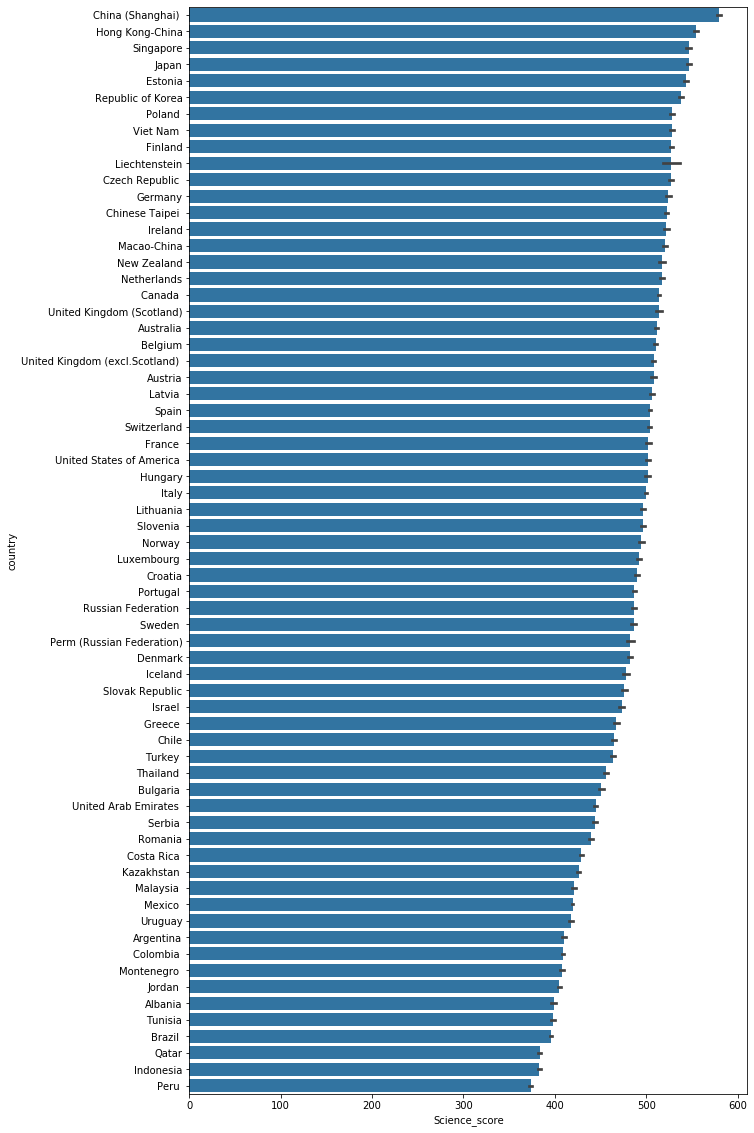

In [45]:
plt.figure(figsize=(10,20))
base_color=sb.color_palette()[0]
Science_score_means=data_clean.groupby('country')['Science_score'].mean()
order=Science_score_means.sort_values(ascending=False).index
data_clean_math=data_clean['country'].value_counts()
sb.barplot(x="Science_score", y="country", data=data_clean, order=order,color=base_color,ci=95)

### Perceived Control VS Scores

Unexpectedly, the mindset variables didn't have a great impact on Math,Reading and Science Scores as it isn't a 75% confidence interval.For the variable "can_succeed_if_effort",there was a slightly less score and we can think that this value could be greater in another experiment environment.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

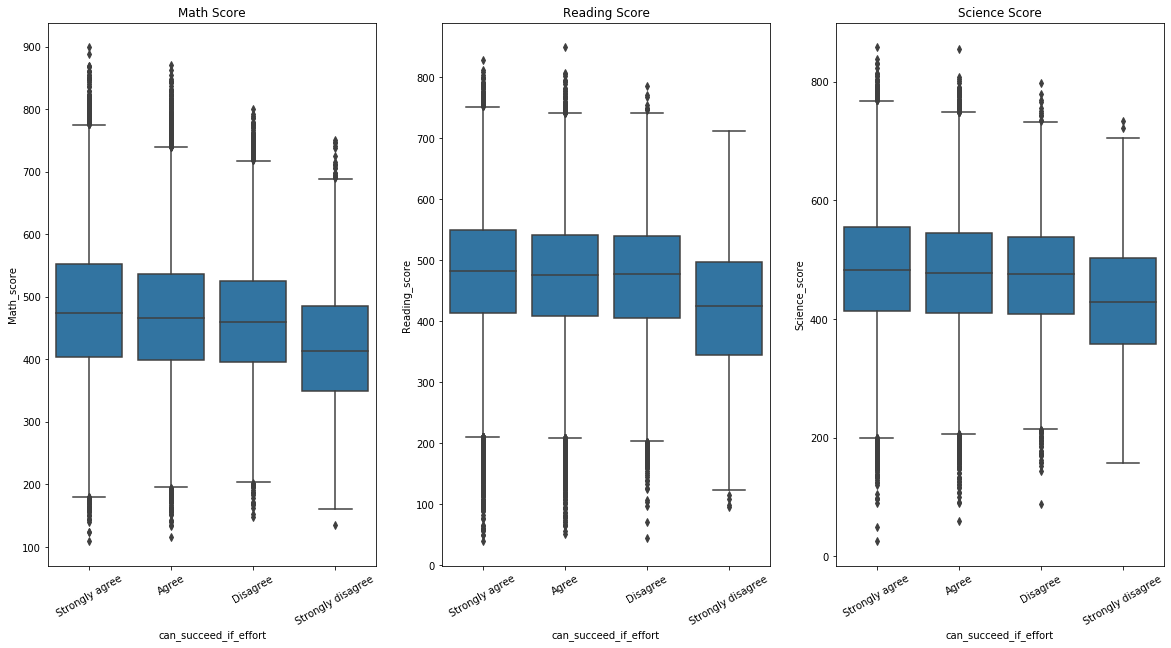

In [46]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_perf, x = 'can_succeed_if_effort', y = 'Math_score', color = base_color)
plt.title('Math Score')
plt.xticks(rotation=30)
# right plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = data_clean_perf, x = 'can_succeed_if_effort', y = 'Reading_score', color = base_color)
plt.title('Reading Score')
plt.xticks(rotation=30)
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.subplot(1, 3, 3)
sb.boxplot(data = data_clean_perf, x = 'can_succeed_if_effort', y = 'Science_score', color = base_color)
plt.title('Science Score')
plt.xticks(rotation=30)

We can observe the same thing for "up_to_me", but with a lower decrease for "strongly disagree".

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

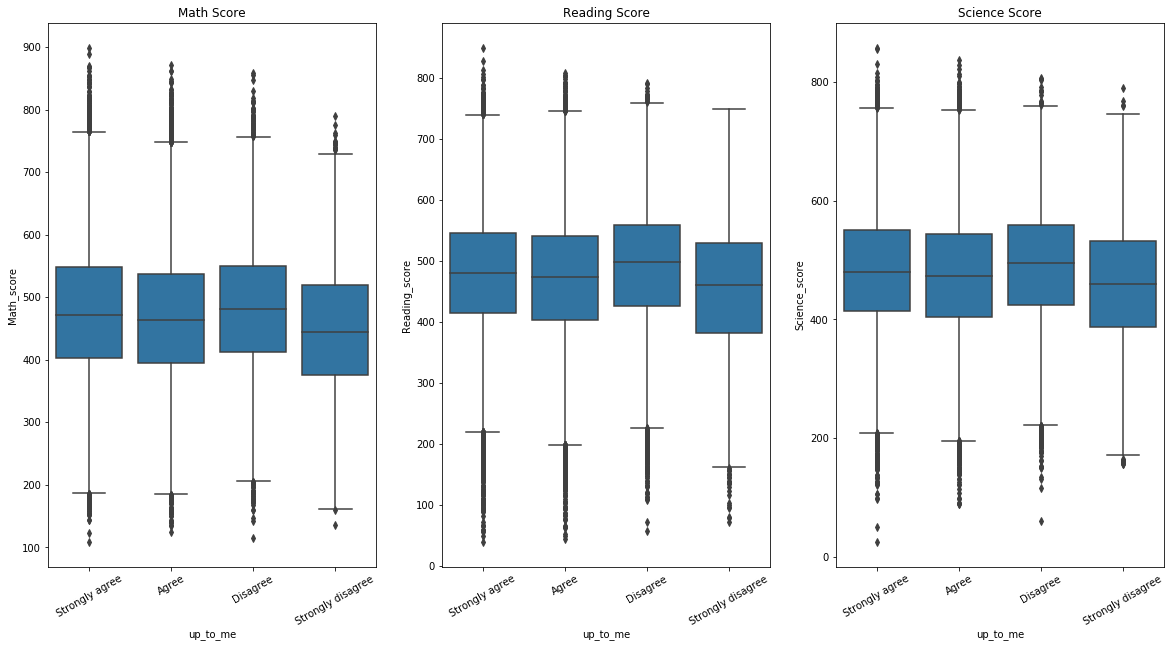

In [47]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_perf, x = 'up_to_me', y = 'Math_score', color = base_color)
plt.title('Math Score')
plt.xticks(rotation=30)
# right plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = data_clean_perf, x = 'up_to_me', y = 'Reading_score', color = base_color)
plt.title('Reading Score')
plt.xticks(rotation=30)
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.subplot(1, 3, 3)
sb.boxplot(data = data_clean_perf, x = 'up_to_me', y = 'Science_score', color = base_color)
plt.title('Science Score')
plt.xticks(rotation=30)

There is a slightly lower score when people agree that they were in great family demands and problems. So we could say that this variable could explain a little of the scores variation.

Text(0.5, 1.0, 'Science Score')

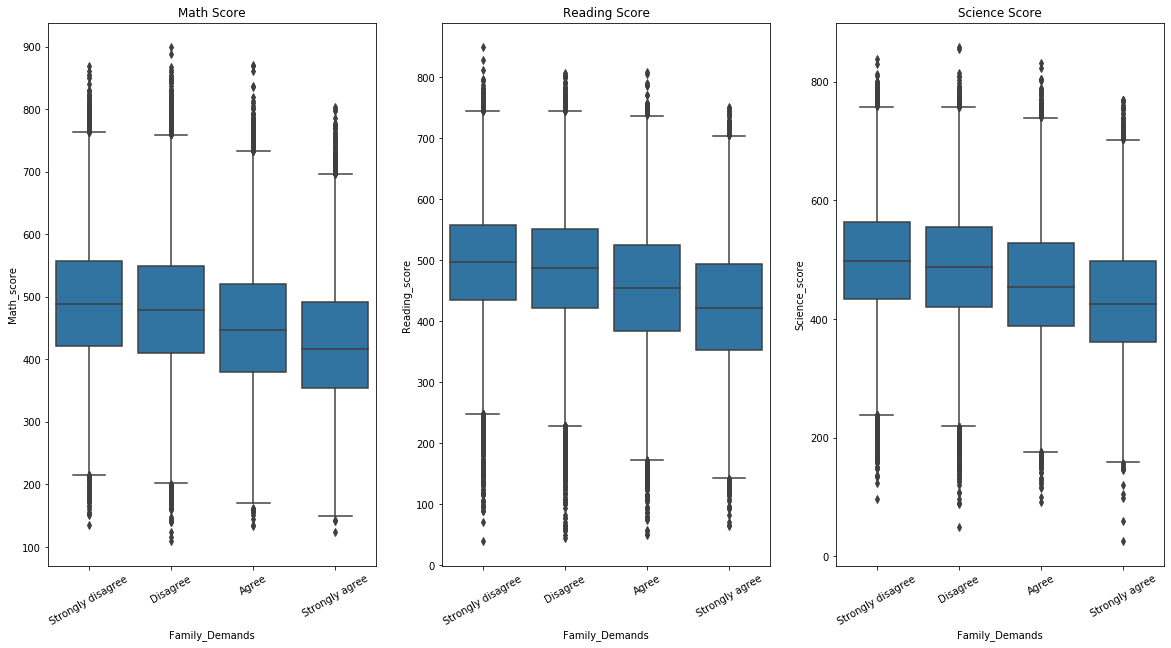

In [48]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_demands_scores=['Strongly disagree','Disagree','Agree','Strongly agree']
# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_perf, x = 'Family_Demands', y = 'Math_score', order=order_demands_scores,color = base_color)
plt.title('Math Score')
plt.xticks(rotation=30)
# right plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = data_clean_perf, x = 'Family_Demands', y = 'Reading_score', order=order_demands_scores,color = base_color)
plt.title('Reading Score')
plt.xticks(rotation=30)
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.subplot(1, 3, 3)
sb.boxplot(data = data_clean_perf, x = 'Family_Demands', y = 'Science_score', order=order_demands_scores,color = base_color)
plt.xticks(rotation=30)
plt.title('Science Score')


The same thing could be observed in "Different Teachers", but in more slightly. It could be argued that these are the variables with more distribution, so it might be that people are afraid to say they have problem.

Text(0.5, 1.0, 'Science Score')

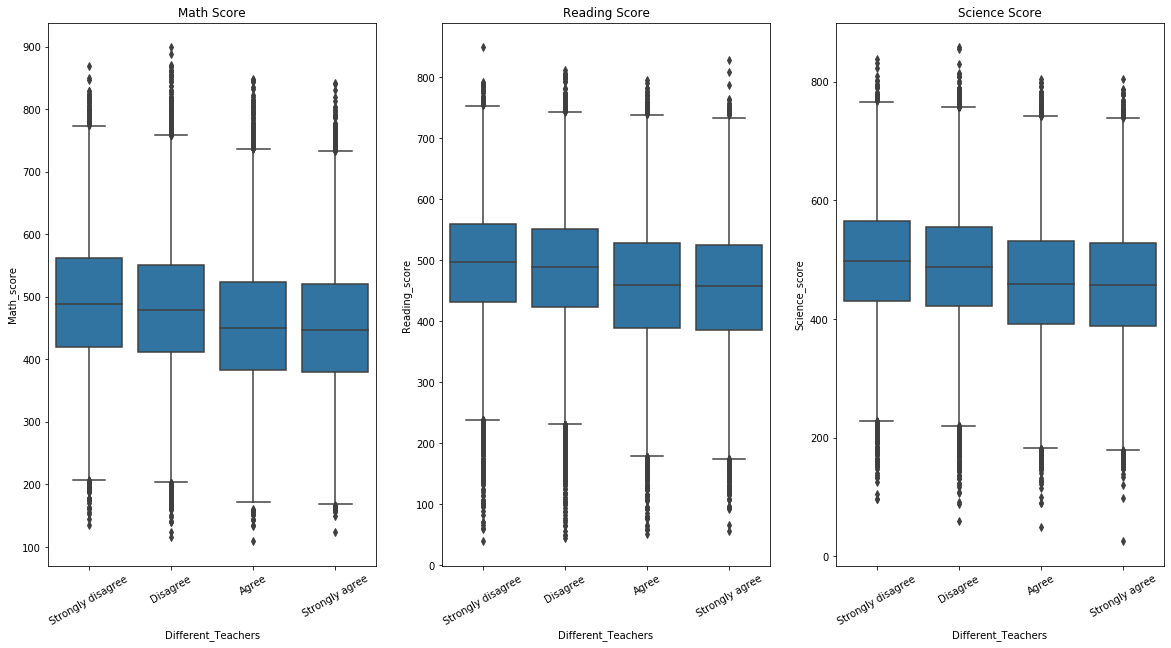

In [49]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_demands_different=['Strongly disagree','Disagree','Agree','Strongly agree']
# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_perf, x = 'Different_Teachers', y = 'Math_score', order=order_demands_different,color = base_color)
plt.title('Math Score')
plt.xticks(rotation=30)
# right plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = data_clean_perf, x = 'Different_Teachers', y = 'Reading_score', order=order_demands_different,color = base_color)
plt.title('Reading Score')
plt.xticks(rotation=30)
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.subplot(1, 3, 3)
sb.boxplot(data = data_clean_perf, x = 'Different_Teachers', y = 'Science_score', order=order_demands_different,color = base_color)
plt.xticks(rotation=30)
plt.title('Science Score')

There is the same observation, but in much smaller. It appears that more there are negative values, more there is score variation accross the variable.

Text(0.5, 1.0, 'Science Score')

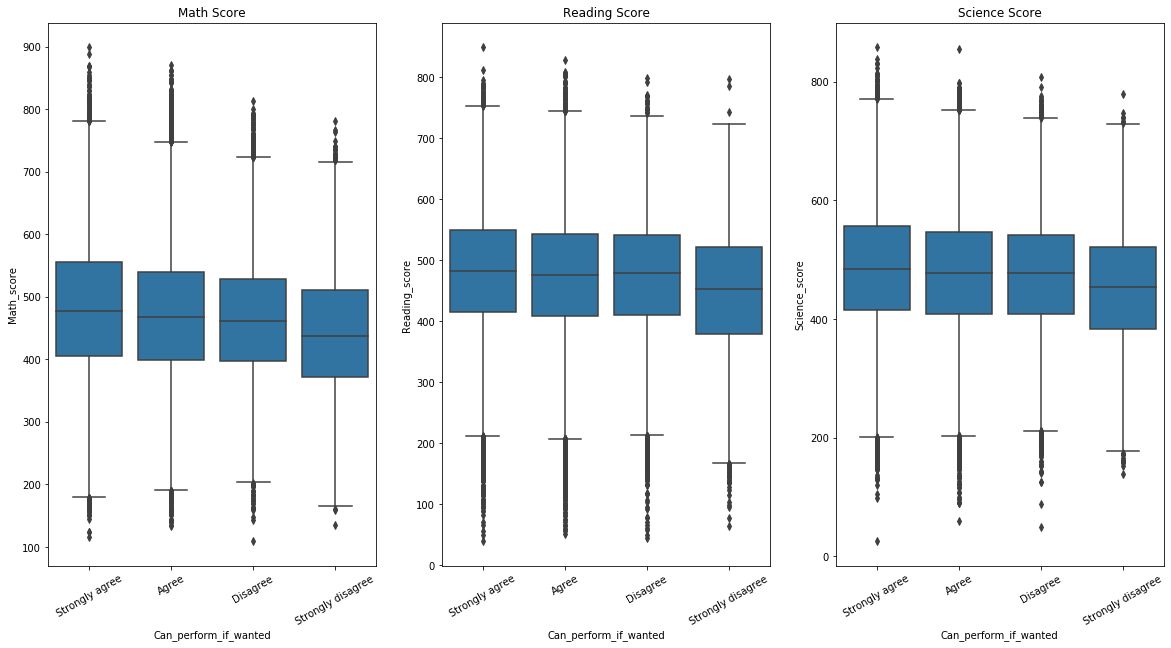

In [50]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_demands_can_perform=['Strongly agree','Agree','Disagree','Strongly disagree']
# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_perf, x = 'Can_perform_if_wanted', y = 'Math_score', order=order_demands_can_perform,color = base_color)
plt.title('Math Score')
plt.xticks(rotation=30)
# right plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = data_clean_perf, x = 'Can_perform_if_wanted', y = 'Reading_score', order=order_demands_can_perform,color = base_color)
plt.title('Reading Score')
plt.xticks(rotation=30)
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.subplot(1, 3, 3)
sb.boxplot(data = data_clean_perf, x = 'Can_perform_if_wanted', y = 'Science_score', order=order_demands_can_perform,color = base_color)
plt.xticks(rotation=30)
plt.title('Science Score')

This variable has the biggest variation. All these mindset variables have got a different distribution, but this one had a progressive distribution.

Text(0.5, 1.0, 'Science Score')

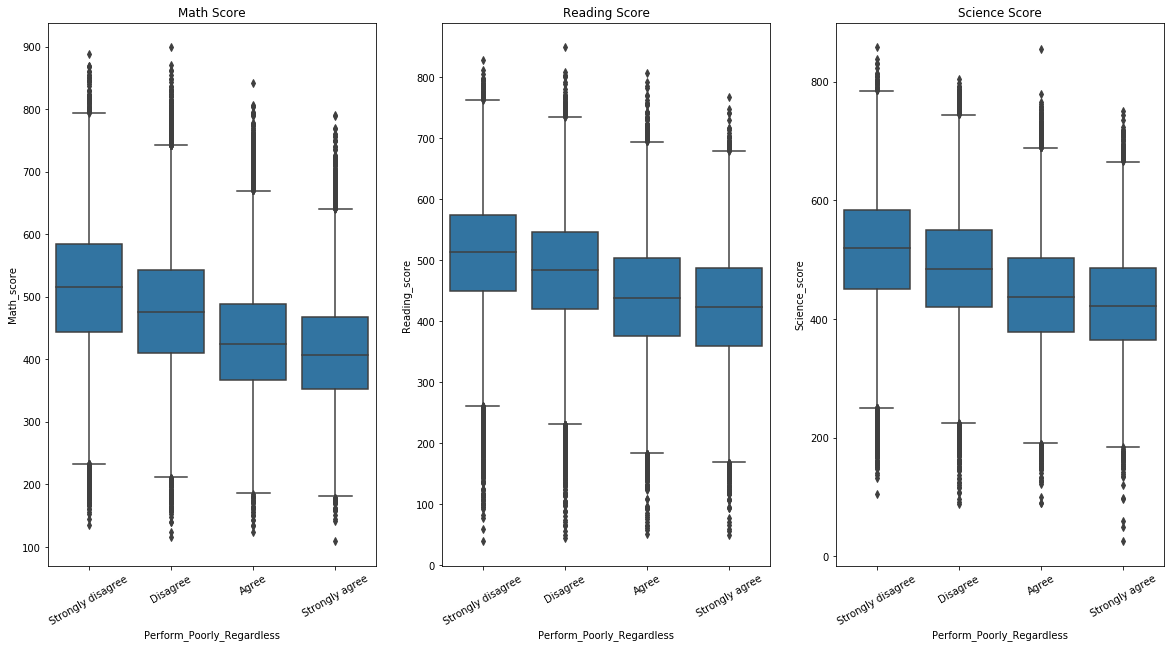

In [51]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_demands_regardless=['Strongly disagree','Disagree','Agree','Strongly agree']
# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_perf, x = 'Perform_Poorly_Regardless', y = 'Math_score', order=order_demands_regardless,color = base_color)
plt.title('Math Score')
plt.xticks(rotation=30)
# right plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = data_clean_perf, x = 'Perform_Poorly_Regardless', y = 'Reading_score', order=order_demands_regardless,color = base_color)
plt.title('Reading Score')
plt.xticks(rotation=30)
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.subplot(1, 3, 3)
sb.boxplot(data = data_clean_perf, x = 'Perform_Poorly_Regardless', y = 'Science_score', order=order_demands_regardless,color = base_color)
plt.xticks(rotation=30)
plt.title('Science Score')

### Understanding the top three countries with the bottom two countries difference
As I didn't get any difference between results, I wanted to explore top three countries with bottom two countries regarding the Math, Reading and Science Scores. I took these countries because they are the ones which are always on top or on bottom.

In [52]:
data_clean_top_bottom_country=data_clean_perf[data_clean_perf['country'].isin(["China (Shanghai) ",'Singapore','Hong Kong-China','Qatar','Peru '])]

In [53]:
data_clean_top_bottom_country.head()

,country,Gender,can_succeed_if_effort,up_to_me,Family_Demands,Different_Teachers,Can_perform_if_wanted,Perform_Poorly_Regardless,Math_score,Reading_score,Science_score
206901,Hong Kong-China,Male,Agree,Agree,Agree,Disagree,Agree,Disagree,499.851975,444.74050,482.59978
206902,Hong Kong-China,Male,Strongly agree,Agree,Disagree,Agree,Strongly agree,Strongly disagree,500.747800,453.80248,502.46178
206903,Hong Kong-China,Male,Agree,Agree,Agree,Agree,Agree,Agree,327.745725,222.84228,256.75120
206904,Hong Kong-China,Male,Disagree,Strongly agree,Strongly disagree,Strongly agree,Agree,Disagree,507.135050,516.43436,525.30772
206905,Hong Kong-China,Male,Strongly agree,Strongly agree,Disagree,Disagree,Agree,Strongly disagree,549.275600,556.05044,571.83888


Text(0.5, 1.0, 'Science Score')

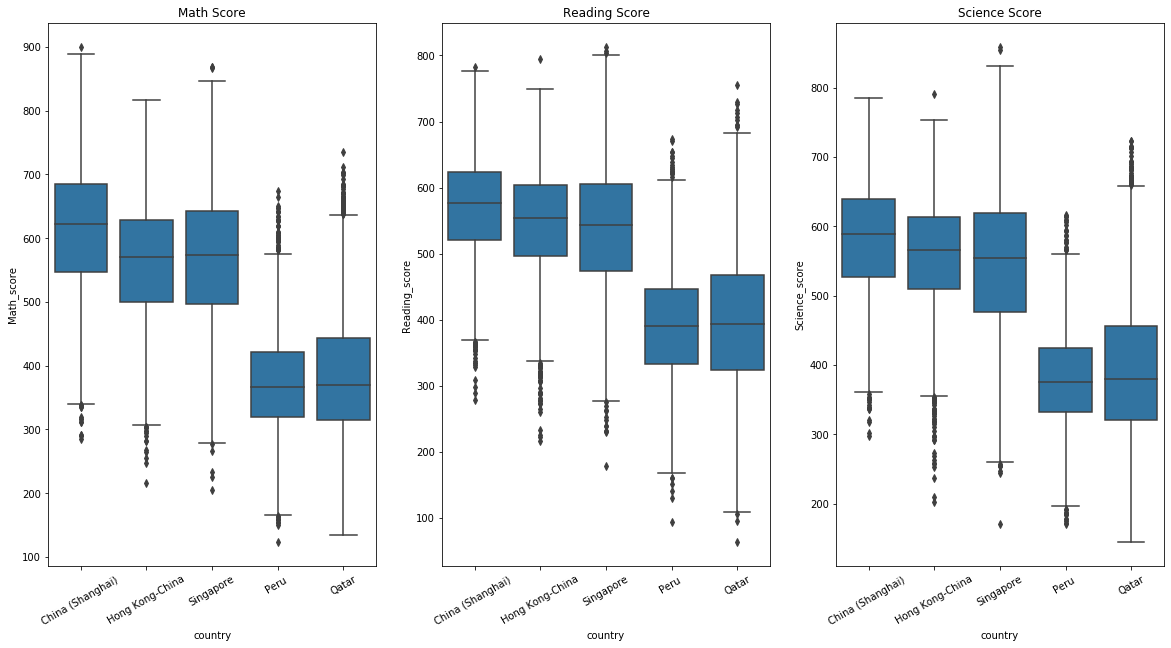

In [82]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_country=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'country', y = 'Math_score', order=order_country,color = base_color)
plt.title('Math Score')
plt.xticks(rotation=30)
# right plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = data_clean_top_bottom_country, x = 'country', y = 'Reading_score', order=order_country,color = base_color)
plt.title('Reading Score')
plt.xticks(rotation=30)
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.subplot(1, 3, 3)
sb.boxplot(data = data_clean_top_bottom_country, x = 'country', y = 'Science_score', order=order_country,color = base_color)
plt.xticks(rotation=30)
plt.title('Science Score')

### Top-Bottom Countries VS mindset variables

I wanted to select top-bottom countries to see if there were a significant difference. It might have one, but the observations difference made it difficult to be really sure. However, it appears to have more negative values in "Peru" and "Qatar"

Text(0.5, 1.0, 'can_succed_if_effort VS some countries')

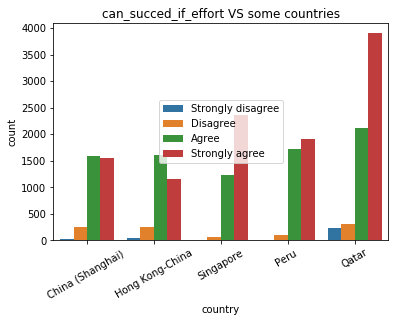

In [98]:
order_country=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
ax = sb.countplot(data = data_clean_top_bottom_country, x = 'country', hue = 'can_succeed_if_effort',order=order_country,hue_order=['Strongly disagree','Disagree','Agree','Strongly agree'])
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'can_succeed_if_effort')
plt.xticks(rotation=30)
plt.legend(loc=10)
plt.title('can_succed_if_effort VS some countries')

Text(0.5, 1.0, 'up to me VS countries')

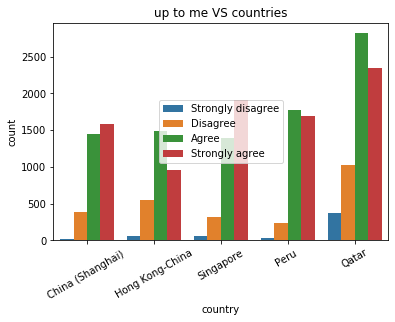

In [56]:
order=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
ax = sb.countplot(data = data_clean_top_bottom_country, x = 'country', hue = 'up_to_me',order=order,hue_order=['Strongly disagree','Disagree','Agree','Strongly agree'])
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'up_to_me')
plt.xticks(rotation=30)
plt.legend(loc=10)
plt.title('up to me VS countries')

Text(0.5, 1.0, 'Family Demands and Problems VS some countries')

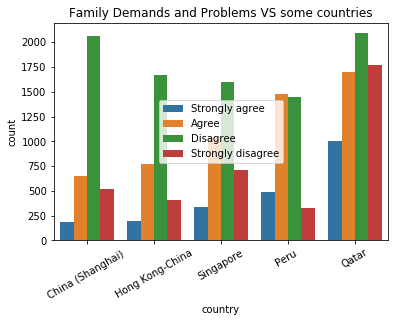

In [57]:
order=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
ax = sb.countplot(data = data_clean_top_bottom_country, x = 'country', hue = 'Family_Demands',order=order,hue_order=['Strongly agree','Agree','Disagree','Strongly disagree'])
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Family_Demands')
plt.xticks(rotation=30)
plt.legend(loc=10)
plt.title('Family Demands and Problems VS some countries')

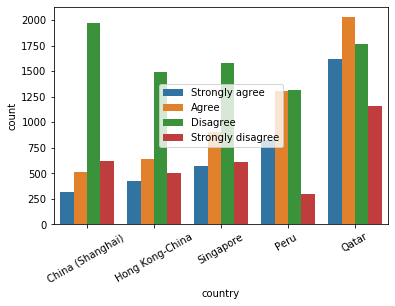

In [58]:
order=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
ax = sb.countplot(data = data_clean_top_bottom_country, x = 'country', hue = 'Different_Teachers',order=order,hue_order=['Strongly agree','Agree','Disagree','Strongly disagree'])
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Different_Teachers')
plt.xticks(rotation=30)
plt.legend(loc=10)

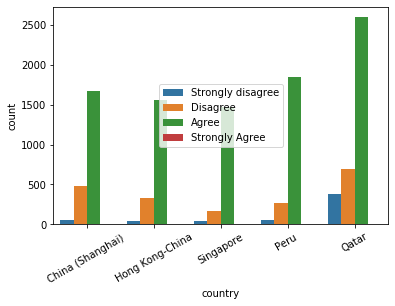

In [59]:
order=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
ax = sb.countplot(data = data_clean_top_bottom_country, x = 'country', hue = 'Can_perform_if_wanted',order=order,hue_order=['Strongly disagree','Disagree','Agree','Strongly Agree'])
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Can_perform_if_wanted')
plt.xticks(rotation=30)
plt.legend(loc=10)

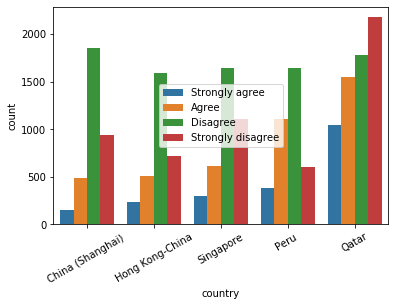

In [60]:
order=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
ax = sb.countplot(data = data_clean_top_bottom_country, x = 'country', hue = 'Perform_Poorly_Regardless',order=order,hue_order=['Strongly agree','Agree','Disagree','Strongly disagree'])
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Perform_Poorly_Regardless')
plt.xticks(rotation=30)
plt.legend(loc=10)

## Multivariate Visualization

### Gender

One interesting thing to observe is that Female seems more resilient in Reading score because of the trend we can observe.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

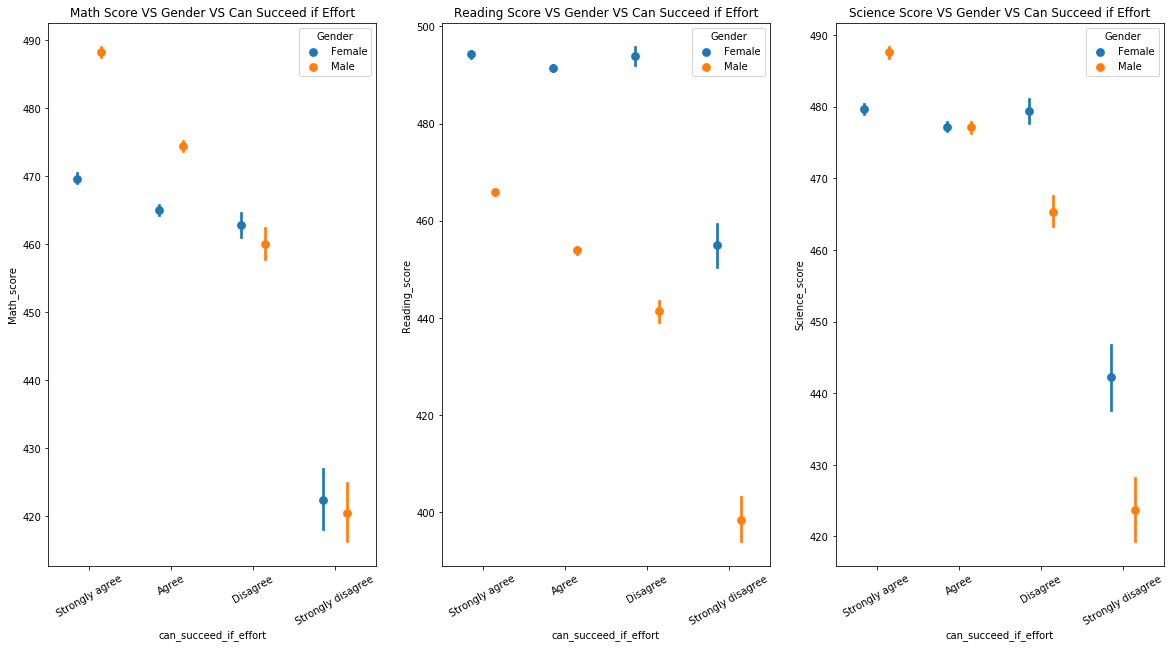

In [61]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_gender_can_succeed=['Strongly agree','Agree','Disagree','Strongly disagree']
# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.pointplot(data = data_clean_perf, x = 'can_succeed_if_effort', y = 'Math_score', order=order_gender_can_succeed,hue = 'Gender',
                  dodge = 0.3, linestyles = "")
plt.title('Math Score VS Gender VS Can Succeed if Effort')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.pointplot(data = data_clean_perf, x = 'can_succeed_if_effort', y = 'Reading_score', order=order_gender_can_succeed,hue = 'Gender',
                  dodge = 0.3, linestyles = "")
plt.title('Reading Score VS Gender VS Can Succeed if Effort')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.pointplot(data = data_clean_perf, x = 'can_succeed_if_effort', y = 'Science_score', order=order_gender_can_succeed,hue = 'Gender',
                  dodge = 0.3, linestyles = "")
plt.title('Science Score VS Gender VS Can Succeed if Effort')
plt.xticks(rotation=30)

The same trend can be seen still in Reading score, but for "up_to_me". Male seems more resilient in "Science Score"

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

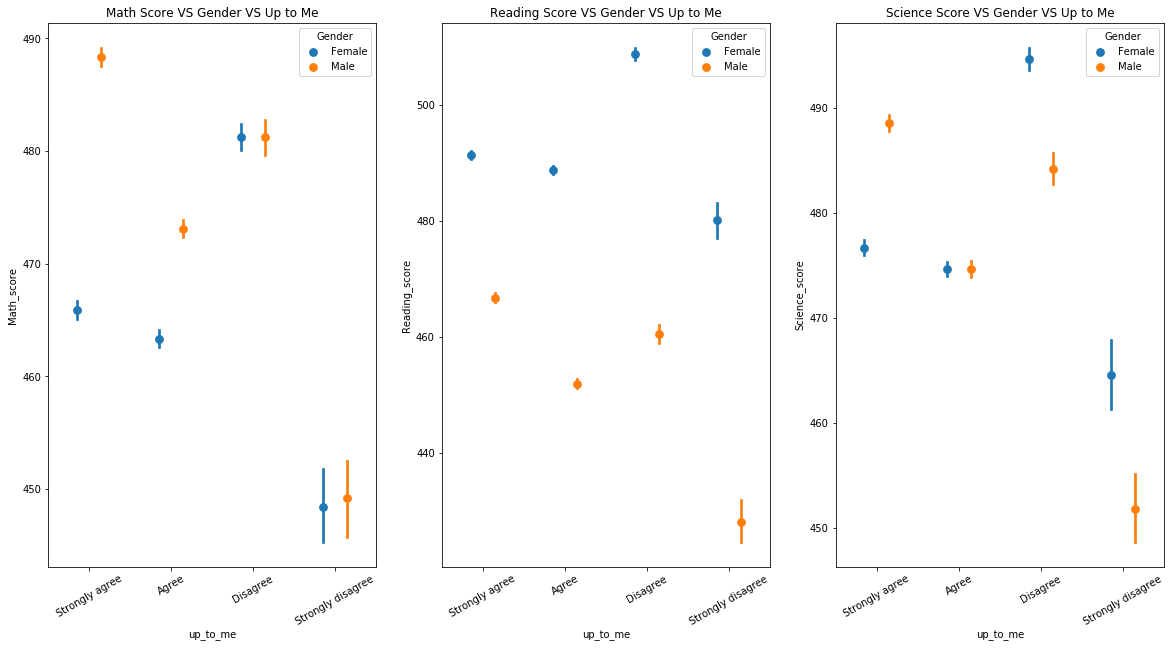

In [62]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_gender_up_to_me=['Strongly agree','Agree','Disagree','Strongly disagree']
# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.pointplot(data = data_clean_perf, x = 'up_to_me', y = 'Math_score', hue = 'Gender',order=order_gender_up_to_me,
                  dodge = 0.3, linestyles = "")
plt.title('Math Score VS Gender VS Up to Me')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.pointplot(data = data_clean_perf, x = 'up_to_me', y = 'Reading_score', hue = 'Gender',order=order_gender_up_to_me,
                  dodge = 0.3, linestyles = "")
plt.title('Reading Score VS Gender VS Up to Me')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.pointplot(data = data_clean_perf, x = 'up_to_me', y = 'Science_score', hue = 'Gender',order=order_gender_up_to_me,
                  dodge = 0.3, linestyles = "")
plt.title('Science Score VS Gender VS Up to Me')
plt.xticks(rotation=30)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

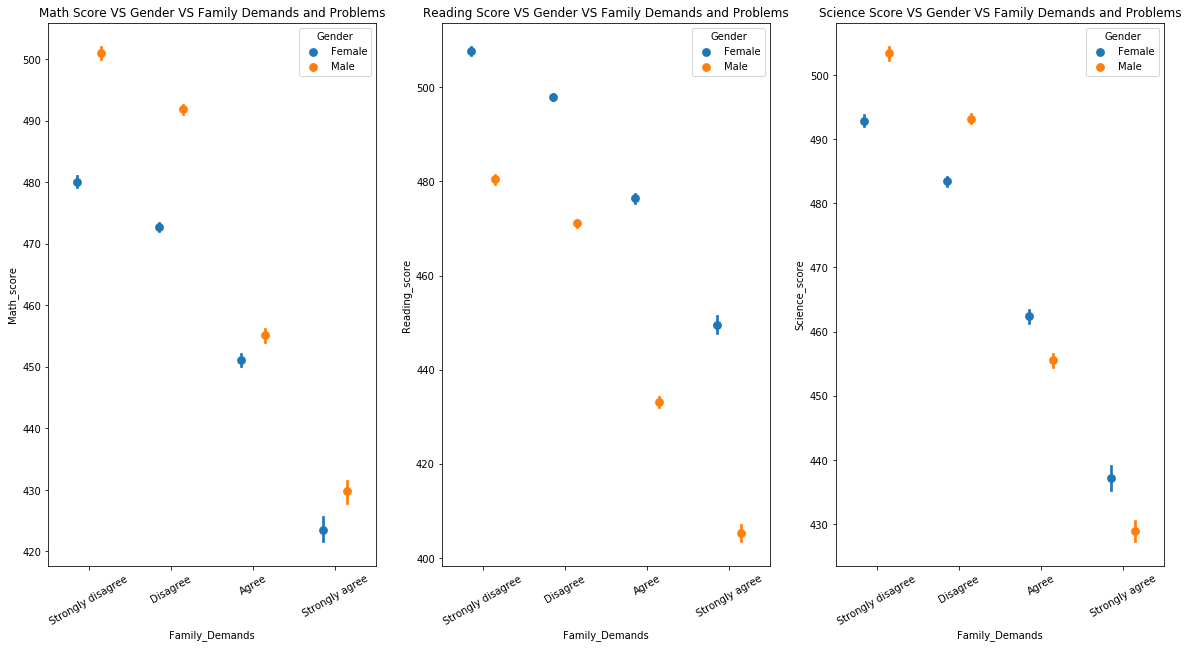

In [63]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_mindset_family_demands=['Strongly disagree','Disagree','Agree','Strongly agree']
# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Family_Demands', y = 'Math_score', hue = 'Gender',order=order_mindset_family_demands,
                  dodge = 0.3, linestyles = "")
plt.title('Math Score VS Gender VS Family Demands and Problems')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Family_Demands', y = 'Reading_score', hue = 'Gender',order=order_mindset_family_demands,
                  dodge = 0.3, linestyles = "")
plt.title('Reading Score VS Gender VS Family Demands and Problems')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Family_Demands', y = 'Science_score', hue = 'Gender',order=order_mindset_family_demands,
                  dodge = 0.3, linestyles = "")
plt.title('Science Score VS Gender VS Family Demands and Problems')
plt.xticks(rotation=30)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

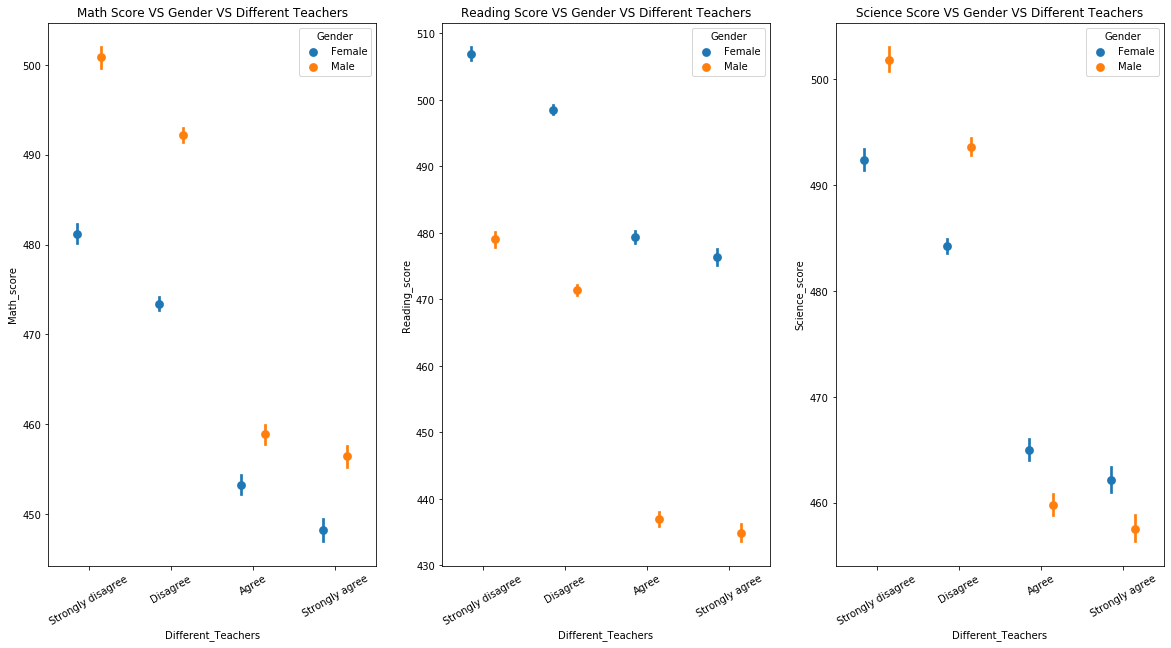

In [64]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_mindset_different=['Strongly disagree','Disagree','Agree','Strongly agree']
# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Different_Teachers', y = 'Math_score', hue = 'Gender',order=order_mindset_different,
                  dodge = 0.3, linestyles = "")
plt.title('Math Score VS Gender VS Different Teachers')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Different_Teachers', y = 'Reading_score', hue = 'Gender',order=order_mindset_different,
                  dodge = 0.3, linestyles = "")
plt.title('Reading Score VS Gender VS Different Teachers')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Different_Teachers', y = 'Science_score', hue = 'Gender',order=order_mindset_different,
                  dodge = 0.3, linestyles = "")
plt.title('Science Score VS Gender VS Different Teachers')
plt.xticks(rotation=30)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

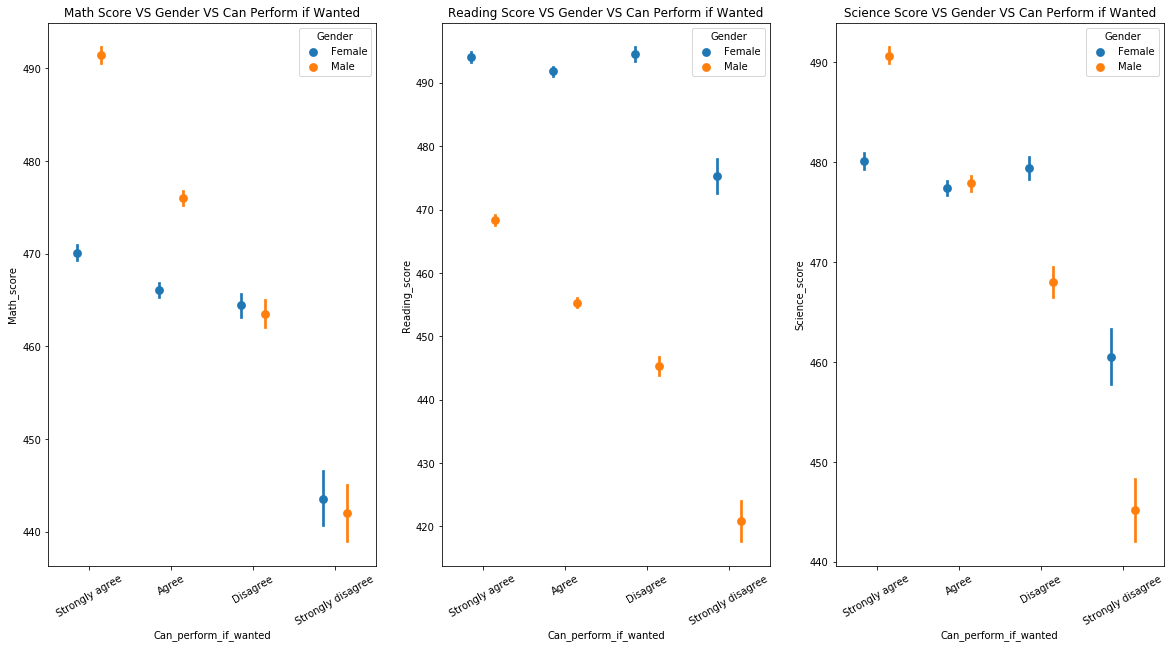

In [65]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_mindset_can_perform=['Strongly agree','Agree','Disagree','Strongly disagree']
# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Can_perform_if_wanted', y = 'Math_score', hue = 'Gender',order=order_mindset_can_perform,
                  dodge = 0.3, linestyles = "")
plt.title('Math Score VS Gender VS Can Perform if Wanted')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Can_perform_if_wanted', y = 'Reading_score', hue = 'Gender',order=order_mindset_can_perform,
                  dodge = 0.3, linestyles = "")
plt.title('Reading Score VS Gender VS Can Perform if Wanted')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Can_perform_if_wanted', y = 'Science_score', hue = 'Gender',order=order_mindset_can_perform,
                  dodge = 0.3, linestyles = "")
plt.title('Science Score VS Gender VS Can Perform if Wanted')
plt.xticks(rotation=30)

Text(0.5, 1.0, 'Science Score VS Gender VS Perform Poorly Regardless')

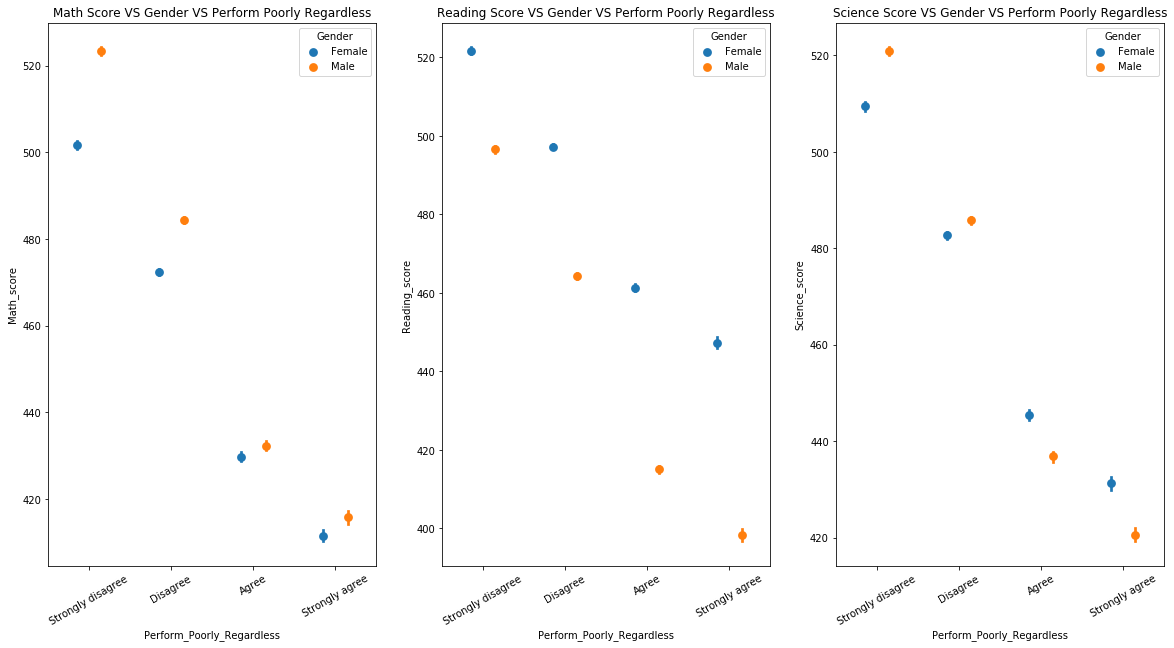

In [66]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_mindset_perform_poorly=['Strongly disagree','Disagree','Agree','Strongly agree']

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Perform_Poorly_Regardless', y = 'Math_score', hue = 'Gender',order=order_mindset_perform_poorly,
                  dodge = 0.3, linestyles = "")
plt.title('Math Score VS Gender VS Perform Poorly Regardless')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Perform_Poorly_Regardless', y = 'Reading_score', hue = 'Gender',order=order_mindset_perform_poorly,
                  dodge = 0.3, linestyles = "")
plt.title('Reading Score VS Gender VS Perform Poorly Regardless')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.pointplot(data = data_clean_perf, x = 'Perform_Poorly_Regardless', y = 'Science_score', hue = 'Gender',order=order_mindset_perform_poorly,
                  dodge = 0.3, linestyles = "")
plt.title('Science Score')
plt.xticks(rotation=30)
plt.title('Science Score VS Gender VS Perform Poorly Regardless')

Text(0.5, 1.0, 'Math Scores VS Gender VS Can Succeed if effort')

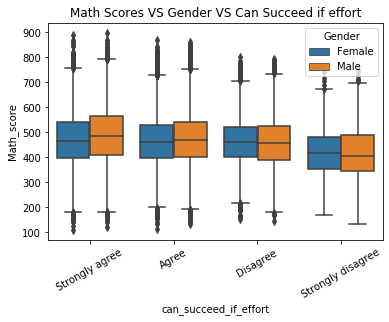

In [91]:
plt.xticks(rotation=30)
ax1 = sb.boxplot(data = data_clean_perf, x = 'can_succeed_if_effort', y = 'Math_score', hue = 'Gender')
plt.title('Math Scores VS Gender VS Can Succeed if effort')

Text(0.5, 1.0, 'Reading Score VS Gender VS Can Succeed if effort')

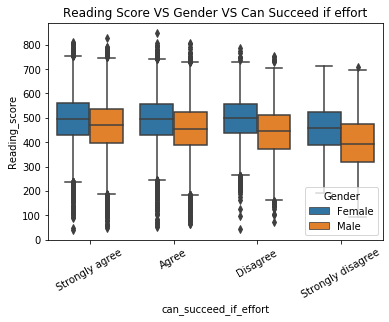

In [92]:
plt.xticks(rotation=30)
ax1 = sb.boxplot(data = data_clean_perf, x = 'can_succeed_if_effort', y = 'Reading_score', hue = 'Gender')
plt.title('Reading Score VS Gender VS Can Succeed if effort')

Text(0.5, 1.0, 'Reading Score VS Gender VS up_to_me')

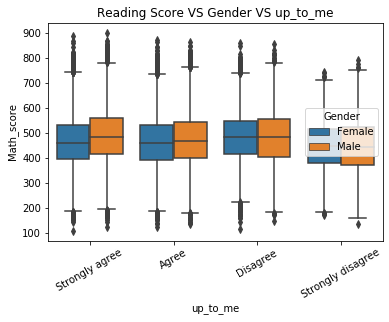

In [93]:
plt.xticks(rotation=30)
ax1 = sb.boxplot(data = data_clean_perf, x = 'up_to_me', y = 'Math_score', hue = 'Gender')
plt.title('Reading Score VS Gender VS up_to_me')

Text(0.5, 1.0, 'Reading Score VS Gender VS Different Teachers')

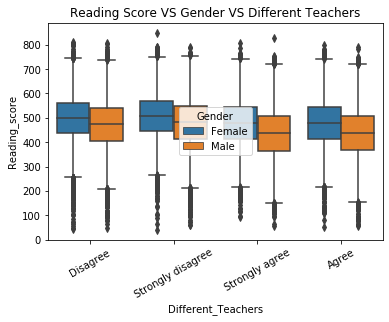

In [94]:
plt.xticks(rotation=30)
ax1 = sb.boxplot(data = data_clean_perf, x = 'Different_Teachers', y = 'Reading_score', hue = 'Gender')
plt.title('Reading Score VS Gender VS Different Teachers')

Text(0.5, 1.0, 'Reading Score VS Gender VS Can_perform_if_wanted')

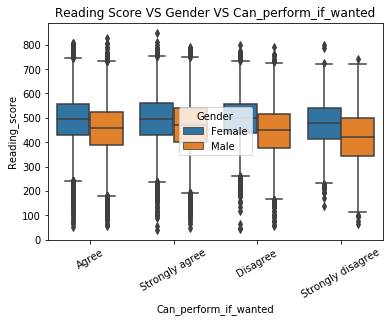

In [95]:
plt.xticks(rotation=30)
ax1 = sb.boxplot(data = data_clean_perf, x = 'Can_perform_if_wanted', y = 'Reading_score', hue = 'Gender')
plt.title('Reading Score VS Gender VS Can_perform_if_wanted')

### Country VS Mindset


I observed if Perceived control could explain the difference between the countries. It appears it don't explain, even if there is some variation in the data.

Text(0.5, 1.0, 'Science Score VS Some countries VS Can Succeed if effort')

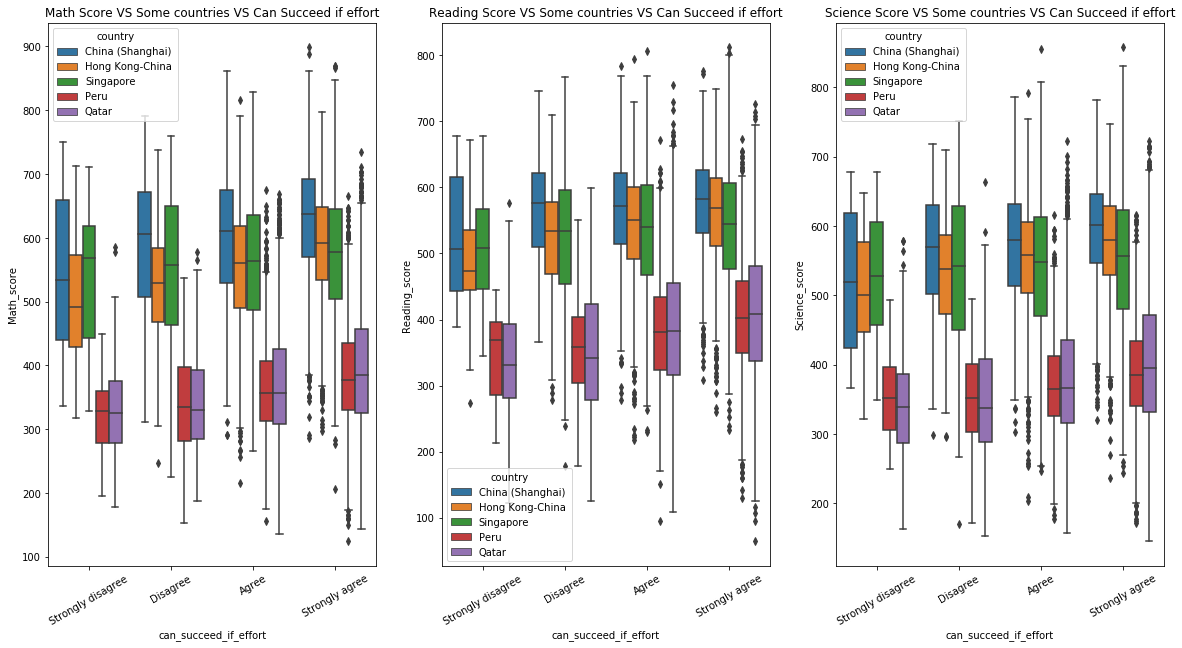

In [72]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_country=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
order_mindset_perform_poorly=['Strongly disagree','Disagree','Agree','Strongly agree']

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'can_succeed_if_effort', y = 'Math_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Math Score VS Some countries VS Can Succeed if effort')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'can_succeed_if_effort', y = 'Reading_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Reading Score VS Some countries VS Can Succeed if effort')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'can_succeed_if_effort', y = 'Science_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Science Score')
plt.xticks(rotation=30)
plt.title('Science Score VS Some countries VS Can Succeed if effort')

Text(0.5, 1.0, 'Science Score VS Some countries VS Up to Me')

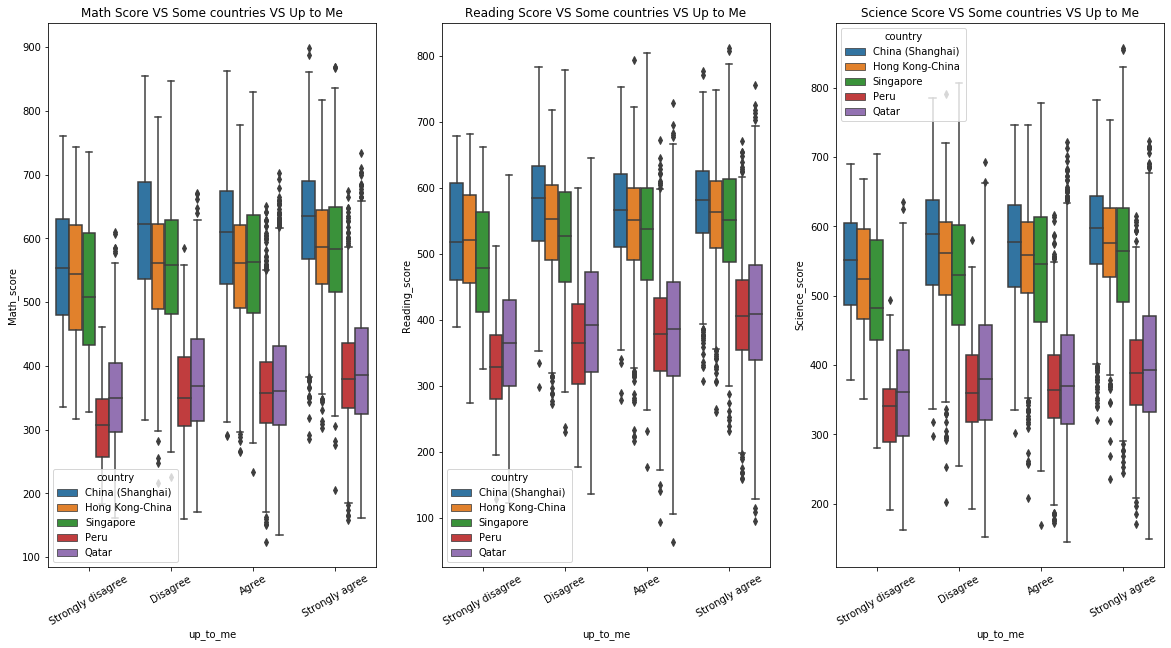

In [73]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_country=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
order_mindset_perform_poorly=['Strongly disagree','Disagree','Agree','Strongly agree']

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'up_to_me', y = 'Math_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Math Score VS Some countries VS Up to Me')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'up_to_me', y = 'Reading_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Reading Score VS Some countries VS Up to Me')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'up_to_me', y = 'Science_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Science Score')
plt.xticks(rotation=30)
plt.title('Science Score VS Some countries VS Up to Me')

Text(0.5, 1.0, 'Science Score VS Some countries VS Family Demands')

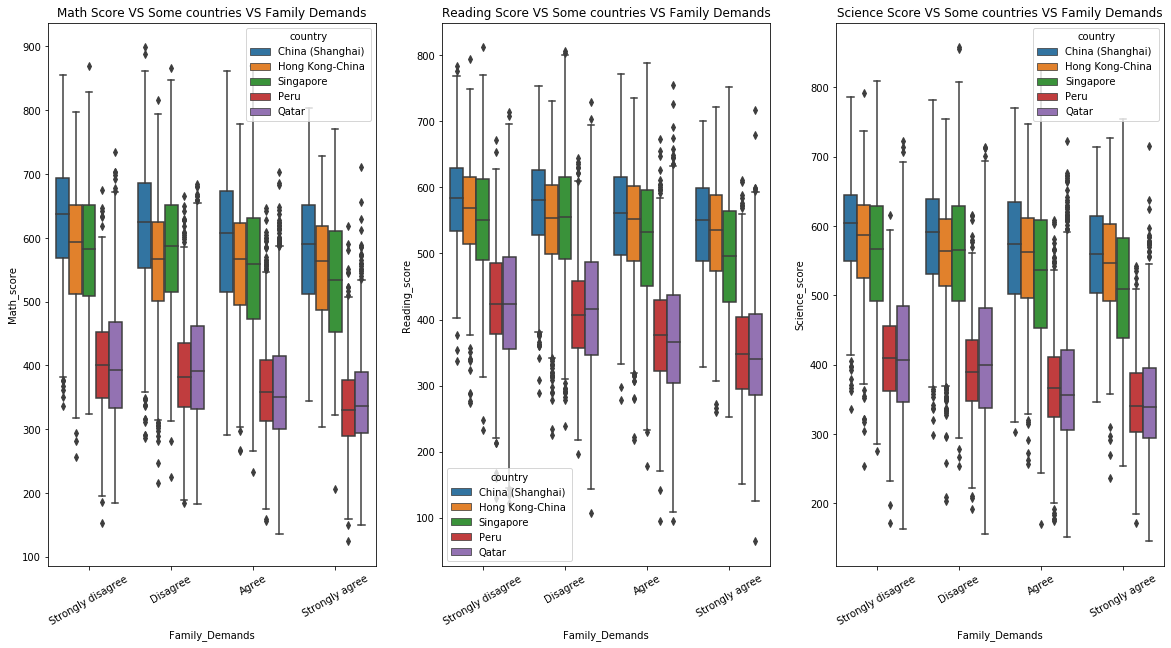

In [74]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_country=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
order_mindset_perform_poorly=['Strongly disagree','Disagree','Agree','Strongly agree']

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Family_Demands', y = 'Math_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Math Score VS Some countries VS Family Demands')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Family_Demands', y = 'Reading_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Reading Score VS Some countries VS Family Demands')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Family_Demands', y = 'Science_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Science Score')
plt.xticks(rotation=30)
plt.title('Science Score VS Some countries VS Family Demands')

Text(0.5, 1.0, 'Science Score VS Some countries VS Different_Teachers')

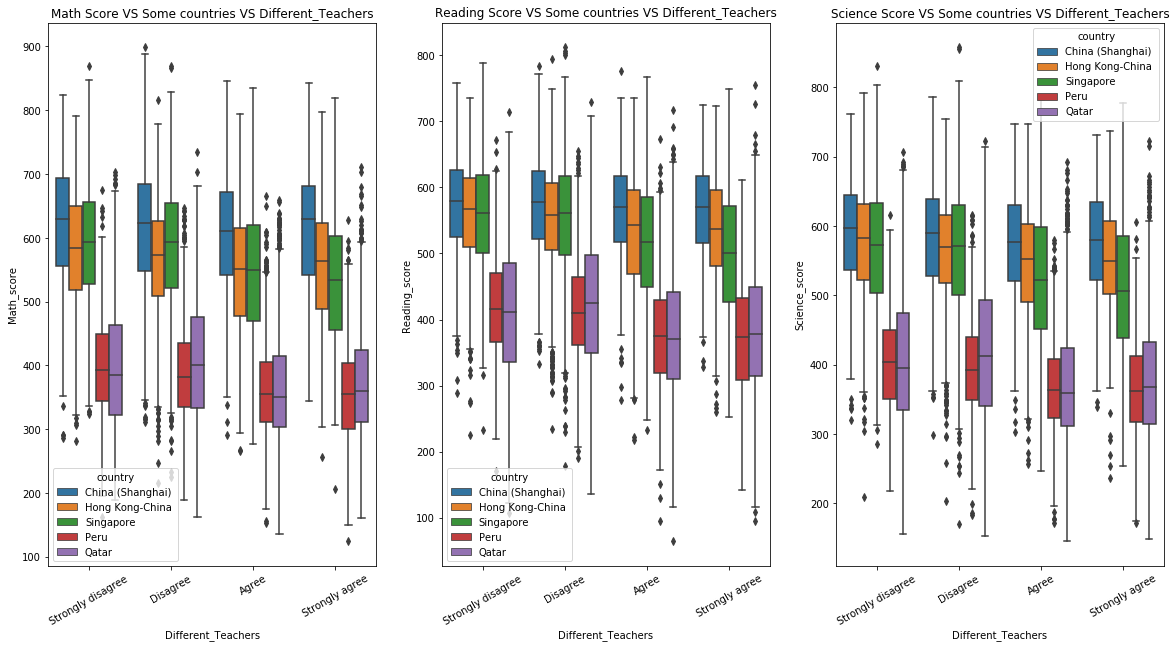

In [75]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_country=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
order_mindset_perform_poorly=['Strongly disagree','Disagree','Agree','Strongly agree']

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Different_Teachers', y = 'Math_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Math Score VS Some countries VS Different_Teachers')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Different_Teachers', y = 'Reading_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Reading Score VS Some countries VS Different_Teachers')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Different_Teachers', y = 'Science_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Science Score')
plt.xticks(rotation=30)
plt.title('Science Score VS Some countries VS Different_Teachers')

Text(0.5, 1.0, 'Science Score VS Some countries VS Can perform if wanted')

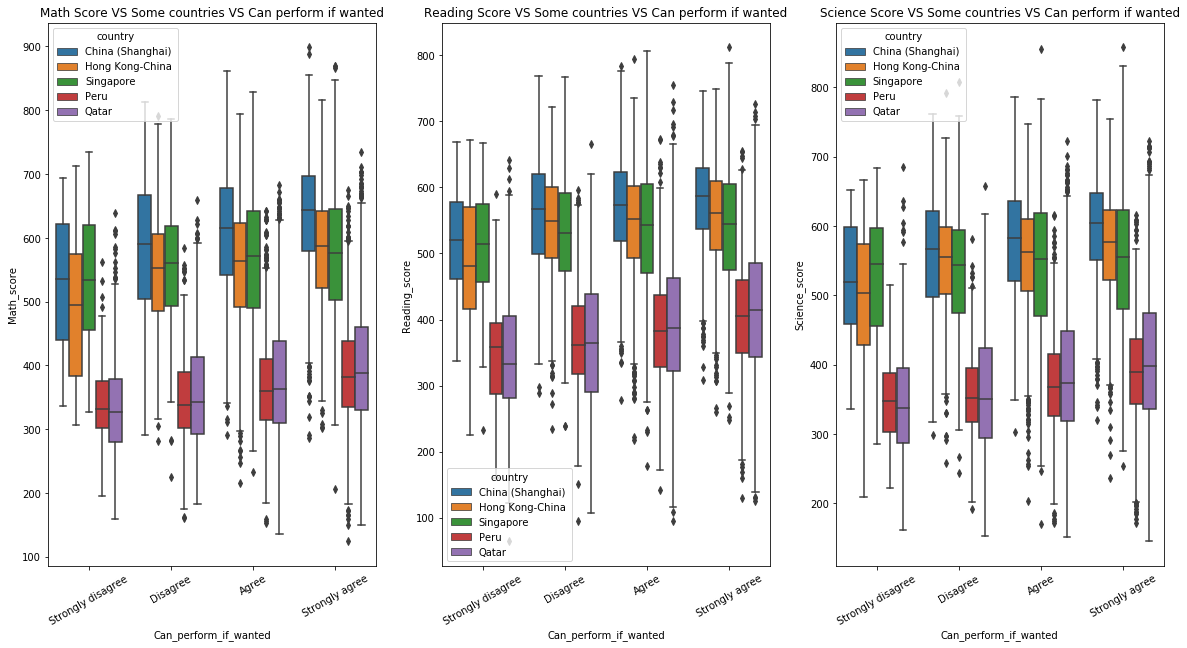

In [76]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_country=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
order_mindset_perform_poorly=['Strongly disagree','Disagree','Agree','Strongly agree']

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Can_perform_if_wanted', y = 'Math_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Math Score VS Some countries VS Can perform if wanted')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Can_perform_if_wanted', y = 'Reading_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Reading Score VS Some countries VS Can perform if wanted')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Can_perform_if_wanted', y = 'Science_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Science Score')
plt.xticks(rotation=30)
plt.title('Science Score VS Some countries VS Can perform if wanted')

Text(0.5, 1.0, 'Science Score VS Some countries VS Perform Poorly Regardless')

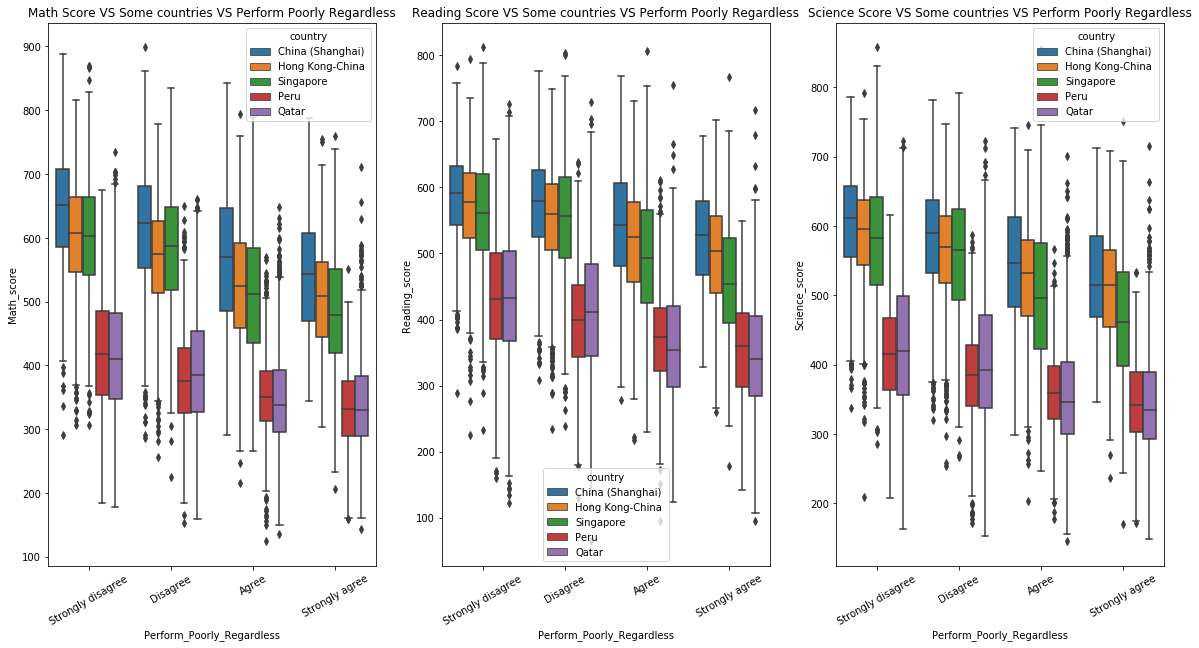

In [77]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_country=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
order_mindset_perform_poorly=['Strongly disagree','Disagree','Agree','Strongly agree']

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Perform_Poorly_Regardless', y = 'Math_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Math Score VS Some countries VS Perform Poorly Regardless')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Perform_Poorly_Regardless', y = 'Reading_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Reading Score VS Some countries VS Perform Poorly Regardless')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'Perform_Poorly_Regardless', y = 'Science_score', hue = 'country',hue_order=order_country,order=order_mindset_perform_poorly,
                  )
plt.title('Science Score')
plt.xticks(rotation=30)
plt.title('Science Score VS Some countries VS Perform Poorly Regardless')

Text(0.5, 1.0, 'Science Score VS Some countries VS Perform Poorly Regardless')

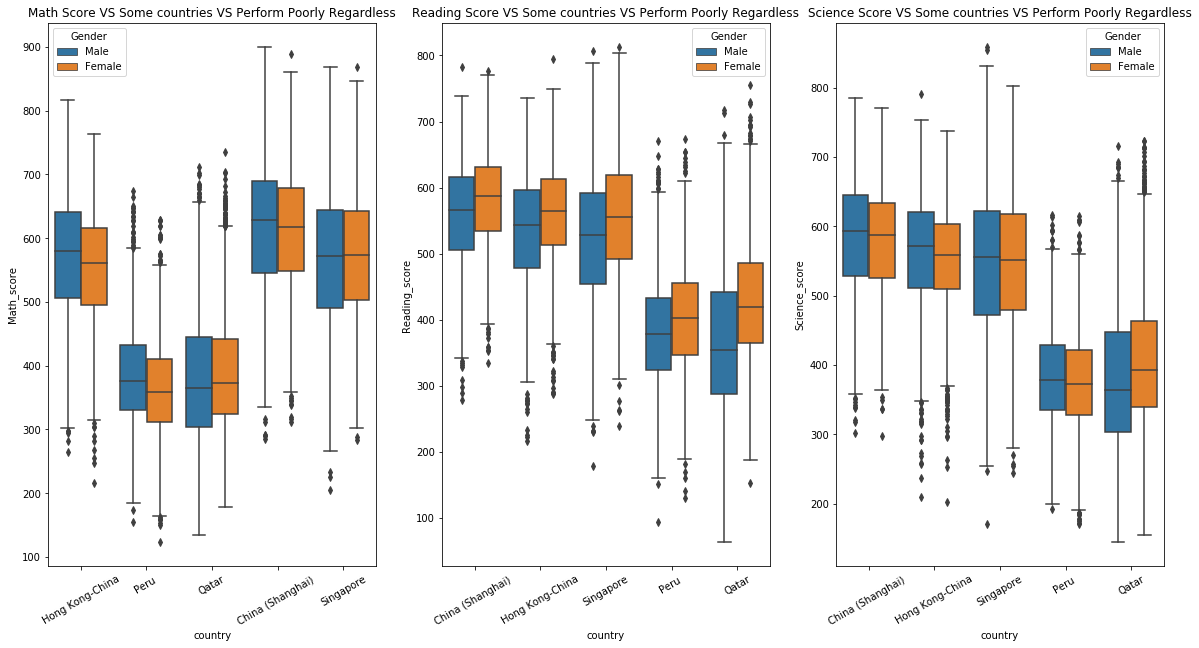

In [90]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]
order_country=['China (Shanghai) ','Hong Kong-China','Singapore','Peru ','Qatar']
order_mindset_perform_poorly=['Strongly disagree','Disagree','Agree','Strongly agree']

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'country', y = 'Math_score', hue = 'Gender',
                  )
plt.title('Math Score VS Some countries VS Perform Poorly Regardless')
plt.xticks(rotation=30)
plt.subplot(1, 3, 2)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x = 'country', y = 'Reading_score', hue = 'Gender',order=order_country,
                  )
plt.title('Reading Score VS Some countries VS Perform Poorly Regardless')
plt.xticks(rotation=30)
plt.subplot(1, 3, 3)
ax1 = sb.boxplot(data = data_clean_top_bottom_country, x ='country' , y = 'Science_score', hue ='Gender' ,order=order_country,
                  )
plt.title('Science Score')
plt.xticks(rotation=30)
plt.title('Science Score VS Some countries VS Perform Poorly Regardless')

In [85]:
data_clean.to_csv('pisa2012_main.csv')

### Conclusion

Several conclusions could be made here:

1) There isn't any significant different between Gender.

2) There are big differences between the countries. Some asian countries like China have better Math, Reading and Science scores, and some countries like Peru and Qatar.

3) Mindset can't explain differences between countries or make difference between Gender. It's very interesting because growth mindset could say that "up to me" could make a big difference, but I'm very dubitative of the validity of mindset variables in this survey, because students might not want to write they have problems in their mind (we see that in the distributions of some variables (like "can succeed if effort" and "up to me")